In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import os.path
from os import path
import seaborn as sns
from scipy import signal
from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [2]:
### FUNCTION DEFINITION ###
## Read Dataframe ###


## 1, -- KDP_nu
KDP_nu_name=["CIR40" ,"CIR50"]
KDP_nu=[1,1.25]

## 2,  --  KDP_w_sat_1  -- -
KDP_w_sat_1_name=["0_33" ,"0_66" ,"1_00"]
KDP_w_sat_1=[0.33, 0.66 ,1.00]

## 3,  --  KDP_w_sat_2  -- -
KDP_w_sat_2_name=["ImmunEscp_Jul" ,"ImmunEscp_Sep", "ImmunEscp_Nov"]
KDP_w_sat_2=[380, 442 ,503]

## 4,  --  KDP_g_1  -- -
KDP_g_1_name=["0_33", "0_66" ,"1_00"]
KDP_g_1=[0.33, 0.66, 1.00]

## 5,  --  KDP_g_2  -- -
KDP_g_2_name=["ABW150Days" ,"ABW180Days"]
KDP_g_2=[150 ,180]

## 6,  --  KDP_c_p  -- -
KDP_c_p_name=["Vaccine_PresentRate", "Vaccine_BestWeekAvg", "Vaccine_TwicePresent"]
KDP_c_p=[1 ,1.5, 2]

KDP_lambda_name=["SD_RA","SD_RAR","SD_RARF"]
KDP_lambda=[0,0.1,0.2]

### CODE FOR OBTAINING DATE VALUES ####################
start ="2020-07-01"
end  = "2022-06-30"

start = datetime.datetime.strptime(start, "%Y-%m-%d")
end = datetime.datetime.strptime(end, "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]



for i in range(len(date_generated)):
    date_generated[i] = date_generated[i].strftime("%d-%b-%y")


def ReadDF(fname,colString):
    df_master = pd.DataFrame()
    dateOfPeak = []
    dayOfPeak = []
    numAtPeak = []
    vaccRate = []
    numRead = 0
    for i in range(len(KDP_nu)):
            for j in range(len(KDP_w_sat_1)):
                for k in range(len(KDP_w_sat_2)):
                    for l in range(len(KDP_g_1_name)):
                        for m in range(len(KDP_g_2)):
                            for n in range(len(KDP_c_p)):
                                for o in range(len(KDP_lambda)):
                                    if(path.exists(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+ fname)):
                                        df_temp = pd.read_csv(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+fname, delim_whitespace=True, header=1).transpose().loc[colString:]

                                        

                                        ExptId = KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]
                                        VaccineRt = str(KDP_c_p_name[n])
                                        CIR = str(KDP_nu_name[i]) 
                                        SD = str(KDP_lambda_name[o])
                                        KDPwsat = str(KDP_w_sat_2_name[k])

                                        numRead+=1


                                        df_temp['ID'] = ExptId
                                        df_temp['Vaccine Rate'] = VaccineRt
                                        df_temp['CIR'] = CIR
                                        df_temp['SD'] = SD
                                        df_temp['KDPwsat2']=KDPwsat
                                        df_temp['KDPLambda']=KDP_lambda_name[o]
                                        df_temp['Scenario'] = numRead
                                        
                                                                
                                        df_master = pd.concat([df_master,df_temp])


    print(str(numRead) + " samples have been read ")
    return df_master
                                    

In [3]:
### COMPUTE ####
## Read Master Data ##



################# --- READ THE MASTER DATA ------------- ####################################

df_active= ReadDF("CovidPopulation.data","Total")




#### - Read the Nucleation Data
df_nucleation_total = ReadDF("CovidNucleation.data","Total")
df_nucleation_11 = ReadDF("CovidNucleation_11Yrs.data","Total")
df_nucleation_18 = ReadDF("CovidNucleation_18Yrs.data","Total")
df_nucleation_45 = ReadDF("CovidNucleation_45Yrs.data","Total")
df_nucleation_60 = ReadDF("CovidNucleation_60Yrs.data","Total")
df_nucleation_60plus = ReadDF("CovidNucleation_Above60Yrs.data","Total")


## Read the VaccinationData
#### Read the Vaccination and the Antibody plots

df_antibody = ReadDF("Covid_Vaccinated.data","AntiBody")
df_Vaccinated = ReadDF("Covid_Antibody.data","AntiBody")




972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 


In [4]:
### COMPUTE ####
## Nucleation DataFrames Ratio ##



############# HARDCODED ##########################
##  Total of 730 days simulated 
ROWS = 730

### getList of columns
listOfCols = list(df_nucleation_total.columns.values)

#### create a copy of all the dataframes to store the ratio values
df_nucleation_11_ratio = df_nucleation_11.copy(deep=True)
df_nucleation_18_ratio = df_nucleation_18.copy(deep=True)
df_nucleation_45_ratio = df_nucleation_45.copy(deep=True)
df_nucleation_60_ratio = df_nucleation_60.copy(deep=True)
df_nucleation_60plus_ratio = df_nucleation_60plus.copy(deep=True)

  ## Create just a copy of the dataframe

##### Compute Ratios ##################

for i in range(ROWS + 1):
    df_nucleation_11_ratio[[i]] =  df_nucleation_11_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_18_ratio[[i]] =  df_nucleation_18_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_45_ratio[[i]] =  df_nucleation_45_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60_ratio[[i]] =  df_nucleation_60_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60plus_ratio[[i]] =  df_nucleation_60plus_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 

df_nucleation_18plus_ratio = df_nucleation_45_ratio.copy(deep=True)
df_nucleation_18minus_ratio = df_nucleation_18_ratio.copy(deep=True)
## Append the total of 18+ dataframes to 
df_nucleation_18plus_ratio.iloc[:,0:731] += df_nucleation_60_ratio.iloc[:,0:731] + df_nucleation_60plus_ratio.iloc[:,0:731];

df_nucleation_18minus_ratio.iloc[:,0:731] +=df_nucleation_11_ratio.iloc[:,0:731]


## remove the NA values which occured due to division by zero
df_nucleation_11_ratio = df_nucleation_11_ratio.replace(np.nan,0)
df_nucleation_18_ratio = df_nucleation_18_ratio.replace(np.nan,0)
df_nucleation_45_ratio = df_nucleation_45_ratio.replace(np.nan,0)
df_nucleation_60_ratio = df_nucleation_60_ratio.replace(np.nan,0)
df_nucleation_60plus_ratio = df_nucleation_60plus_ratio.replace(np.nan,0)
df_nucleation_18plus_ratio = df_nucleation_18plus_ratio.replace(np.nan,0)




In [5]:
#####  FUNCTION DECLARATION   #########
#      Add PeakINfo                         ###

import scipy

def AddMeanInfo(df):
    meanval = []
    minval = []
    maxval = []
    for i in range(731):
        meanval.append(np.mean(df[i]))
        minval.append(np.min(df[i]))
        maxval.append(np.max(df[i]))
    df.append(minval)
    df.append(maxval)
    df.append(meanval)
    

### Compute the Peak in the signal #####
## 1, DataFrame
## 2, DateNUmber (0 to 730) to be assigned for NoPeak Scenario
## 3, NUmber of Peak value for No Peak
import scipy
def AddPeakInfo(df_master,df_nuc,noWaveDate,nowaveNumber,JiterNoPeak):
    dateOfPeakActive = []
    numAtPeakActive = []
    dateStringActive = [] 
    dateOfPeakNuc = []
    numAtPeakNuc = []
    dateStringNuc = [] 
    noiseDate = 0;
    noiseNum = 0;
    
    if(JiterNoPeak):    ## Add Jitter when Command is passed 
        rand=np.random.randn(1000) * 10+700
        rann=np.random.randn(1000) * 0.5+0.05
    noWave3=0
    for ia in range(len(df_master)):
        dopm,dictm = scipy.signal.find_peaks(df_master.iloc[[ia]].transpose().loc[400:730,'Total'],distance = 60,height=2000)
        dopn,dictn = scipy.signal.find_peaks(df_nuc.iloc[[ia]].transpose().loc[400:730,'Total'],distance = 60)
        if(len(dopm)>0 and len(dopn)>0):
            for ib in range(len(dopn)):
                if((abs(dopm[0]-dopn[ib]))<=15):
                    dateOfPeakActive.append(dopm[0]+400)
                    dateOfPeakNuc.append(dopn[ib]+400)
                    numAtPeakActive.append(df_active.iloc[ia,dopm[0]+400])
                    numAtPeakNuc.append(df_nucleation_total.iloc[ia,dopn[ib]+400])
                    break
                elif(ib==len(dopn)-1):
                    
                    dateOfPeakNuc.append(noWaveDate)
                    numAtPeakActive.append(df_active.iloc[ia,dopm[0]+400])
                    numAtPeakNuc.append(nowaveNumber)
                    dateOfPeakActive.append(dopm[0]+400)
        elif(len(dopm)>0 and len(dopn)==0):
            print(ia)
        else:
            dateOfPeakActive.append(noWaveDate)
            dateOfPeakNuc.append(noWaveDate)
            numAtPeakNuc.append(nowaveNumber)
            numAtPeakActive.append(nowaveNumber)
            noWave3=noWave3+1       
                    
            
  
                
    df_master['Date Of Peak'] = dateOfPeakActive
    df_master['Number At Peak'] = numAtPeakActive
    #df_master['DateString'] = dateString
    df_master['LogNumAtPeak'] = numpy.log10(numAtPeakActive)
    df_nuc['Date Of Peak'] = dateOfPeakNuc
    df_nuc['Number At Peak'] = numAtPeakNuc
    #df_master['DateString'] = dateString
    df_nuc['LogNumAtPeak'] = numpy.log10(numAtPeakNuc)
    print(noWave3)  
    return (df_master,df_nuc)
        

############ UPDATE FRACTION AT PEAK 
def fracAtPeak(df_plot):
#     df_plot=df[df['Date Of Peak']!=NOWAVEPEAKDATE]
    fracap = []
    for i in range(len(df_plot['Date Of Peak'])):
        if(df_plot['Date Of Peak'][i] != NOWAVEPEAKDATE):
            fracap.append(df_plot.iloc[i,df_plot['Date Of Peak'][i]])
        else:
            fracap.append(0)
    df_plot['fracAtDop'] = fracap
    return df_plot

    

In [6]:
###    COMPUTE            ####
## -PeakDataComputation - AgeGroup  ##

### -- PEAK DATA COMPUTATION --- #####
##########  UPDATE ALL THE NUCLEATION RATIOS AND DATE OF PEAKS FOR ALL DF;s ##############

import numpy


NOWAVEPEAKDATE =  670
NOWAVEPEAKNUMBER = 2


df_active,df_nucleation_total=AddPeakInfo(df_active,df_nucleation_total,NOWAVEPEAKDATE,NOWAVEPEAKNUMBER,False)


### Update the Peak NUcleation Cases on the Sub Distributions
listOfDF = [df_nucleation_11,df_nucleation_18,df_nucleation_45,df_nucleation_60,df_nucleation_60plus  , \
           df_nucleation_11_ratio,df_nucleation_18_ratio,df_nucleation_45_ratio,df_nucleation_60_ratio, \
            df_nucleation_60plus_ratio, df_nucleation_18plus_ratio ,df_nucleation_18minus_ratio]

# listOfDF = [df_nucleation_11_ratio,df_nucleation_18_ratio,df_nucleation_18plus_ratio]

#listOfDF = [df_nucleation_60]

for df in listOfDF:

    df['Date Of Peak']    =  df_nucleation_total['Date Of Peak'].tolist()

    df['Number At Peak']  = 0
    df['LogNumAtPeak']  = 0
    for row in range(df.shape[0]):
        Dop  = df_nucleation_total['Date Of Peak'][row]
        
        if(Dop != NOWAVEPEAKDATE ):   # Normal Date
#             if(df[Dop][row] == 0):
#                 val = 1
#                 df['LogNumAtPeak'][row] = numpy.log10(val)
#                 df['Number At Peak'][row] = df[Dop][row]+1
#             else:
#                 df['Number At Peak'][row] = df[Dop][row]+1
#                 df['LogNumAtPeak'][row] = numpy.log10(df[Dop][row]+1)
            df['Number At Peak'][row] = df[Dop][row]+2
            df['LogNumAtPeak'][row] = numpy.log10(df[Dop][row]+2)
            #if(df['CIR'][row]=='CIR50' and df['KDPwsat2'][row]=='ImmunEscp_Sep' and df['Vaccine Rate'][row]=='Vaccine_TwicePresent'):
             #    print(df[Dop][row], df['Number At Peak'][row], df['LogNumAtPeak'][row])
        else:
            df['Number At Peak'][row] = NOWAVEPEAKNUMBER
            df['LogNumAtPeak'][row] = numpy.log10(NOWAVEPEAKNUMBER)
            



### -- Compute the Fractional Data of the Time Series --- #####

df_nucleation_11_ratio = fracAtPeak(df_nucleation_11_ratio)
df_nucleation_18_ratio = fracAtPeak(df_nucleation_18_ratio)
df_nucleation_45_ratio = fracAtPeak(df_nucleation_45_ratio)
df_nucleation_60_ratio = fracAtPeak(df_nucleation_60_ratio)
df_nucleation_60plus_ratio = fracAtPeak(df_nucleation_60plus_ratio)
df_nucleation_18plus_ratio = fracAtPeak(df_nucleation_18plus_ratio)
df_nucleation_18minus_ratio = fracAtPeak(df_nucleation_18minus_ratio)




####### Update the Ratio of Age groups data at peak to the master dataframe
# df_nucleation_total=df_nucleation_total[df_nucleation_total['Date Of Peak']!=NOWAVEPEAKDATE]
df_nucleation_total['11FracAtPeak']=df_nucleation_11_ratio['fracAtDop'].tolist()
df_nucleation_total['18FracAtPeak']=df_nucleation_18_ratio['fracAtDop'].tolist()
df_nucleation_total['45FracAtPeak']=df_nucleation_45_ratio['fracAtDop'].tolist()
df_nucleation_total['60FracAtPeak']=df_nucleation_60_ratio['fracAtDop'].tolist()
df_nucleation_total['60plusFracAtPeak']=df_nucleation_60plus_ratio['fracAtDop'].tolist()
df_nucleation_total['18plusFracAtPeak']=df_nucleation_18plus_ratio['fracAtDop'].tolist()
df_nucleation_total['18minusFracAtPeak']=df_nucleation_18minus_ratio['fracAtDop'].tolist()
df_nucleation_total.shape[0]

324


972

In [7]:
### ---- FUNCTION DEFINITION  ----   ####
### @@ DataGenerator - HistPlot   ###



# DATA GENERATOR - NUMBER OF CASES
####################################_____[[ DATA GENERERATOR ]] FOR NUMBER OF CASES ______________________ #################################

from scipy.stats import norm
import numpy
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



def GenerateData(df_active,YColumn,Bandwidth,N_bins,LinePLotVals_Cases,LinePLotX_Cases,NoWaveRatio,boolHist):
    fig, ax = plt.subplots(3,2,figsize=(11,8))
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    kernel = 'epanechnikov'
    KDPCIR=["CIR= 40", "CIR= 50"]
    KDPImm=["EEscape Period - July","Escape Period - September", "Escape Period  - November"]
    legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
    
    
    
    for i in range(3):
        for j in range(2):
            df_kde=df_active.copy(deep=True)
            df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            
            #index for storing Lineplot arrays
            plotIndex = 0
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]].copy(deep=True)
                
                TotalRows = df_kdep.shape[0]   ### NUmber of Rows for this Selected Scenario
                
                ### Remove Rows With DATE_OF_PEAK = 670
                df_kdep = df_kdep[df_kdep['Date Of Peak']!=NOWAVEPEAKDATE].copy(deep=True)
                
                ### Remove the rows with NUmber at Peak < 500 
                df_kdep = df_kdep[df_kdep['Number At Peak']>200].copy(deep=True)
                
                print(df_active.shape[0])
#                 print("Scenario : ",KDPCIR[j],"_",KDPImm[i],"_",legend[k])
#                 print("Total Rows : ", TotalRows)
#                 print("No Wave Peeks : ", df_kdep.shape[0])
#                 print("Max Peak : ", max(df_kdep['Number At Peak']) )
                ## Truncated Rows
                TruncatedRows = df_kdep.shape[0]
                
                
                hist = sns.histplot(ax=ax[i,j],data=df_kdep,x=YColumn,stat='probability',\
                                    kde=True,label=legend[k],kde_kws={"bw_adjust":Bandwidth},
                                    color=colorVal[k],bins=N_bins)
                
 
                ratio = TruncatedRows/TotalRows    #### Compute Ratio of Wave Scenarios
                
                ratioNoWave = 1.0 - ratio;
                print("Total : " ,TotalRows, " TruncatedRows : ",TruncatedRows,   "  RatioNoWave : " , ratioNoWave)
                
                               
                if(len(hist.get_lines()) == plotIndex+1):
                    ll = hist.get_lines()[k].get_data()
                    LinePLotVals_Cases[i][j][k] = np.asarray(ll[1])
                    LinePLotX_Cases[i][j][k] = np.asarray(ll[0])

                    LinePLotVals_Cases[i][j][k] *=  ratio
                    NoWaveRatio[i][j][k]         =  ratioNoWave
                    
                    plotIndex += 1
                
                else:     ##### No Cases Available
                    print("SOMETHING WRONG")
                    NoWaveRatio[i][j][k]        =   ratioNoWave
                    LinePLotVals_Cases[i][j][k] =   np.zeros(len(LinePLotVals_Cases[i][j][k]))
                    LinePLotX_Cases[i][j][k]    =   np.asarray(hist.get_lines()[0].get_data()[0])
                
#                 ###GET MAX Y VALUE for Y lim
 #                maxYVal = max(LinePLotVals_Cases[i][j][k])
                
                if(not boolHist):
                    ax[i,j].containers[0].remove() # remove the bars
                else:
                    ax[i,j].legend(loc='upper right')
                    handles, labels = ax[i,j].get_legend_handles_labels()
                
                
                ax[i,j].set_title(KDPImm[i]+", "+ KDPCIR[j])
                ax[i,j].set_xlabel(YColumn)
    #             ax[i,j].set_xlim([1,5e6])
#                ax[i,j].set_ylim([0,maxYVal+0.05])
        
                
                

#     plt.legend(handles, labels, loc='lower center',title='Vaccination Rate',fancybox=True,ncol=3,bbox_to_anchor=(0.5,0.97))
    plt.tight_layout()

    plt.show()




In [114]:
###--- FUNCTION DEFINITION ----     ####
### @@ CIR PLOTTER - NumCases   ###



###################### ____________________ PLOTTING SCRIPT _______________ ####################################
####  Input parameter -- DataFrame
####  Generates the 2*3 plot for Each CIR Scenario  [Num at Peak for 3 Immune Escape Variants] [Date of Peak for Immune Escape variants]

def CIR_plotter(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX, \
               NoWave_NumCases_Ratio,Nowave_DOP_Ratio,PlotNameExtension):
    print("CIOMES HERE")
    for cirv in range(2):
        ## 0 - cir40, 1-cir50
        CIRVARIANT = cirv;
        print("CIRV : ", cirv)
        ####### -- PLotter Parameters -- ######
        plt.rcParams["text.usetex"] = False
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = ["Computer Modern"]
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8

        SMALL_SIZE = 8.5
        MEDIUM_SIZE = 8.5
        BIGGER_SIZE = 8.5

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        ## Set plotting parameters   -- Day of Peak
        markersizep = 2
        xtl = []
#         xt = [396,427,457,488,518,549,580,608,639,670+8]   ## 1st days of the months hardcoded 
#         xtl = ['   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','No Wave-3']
        xt = [396,457,518,580,639,670+8]   ## 1st days of the months hardcoded 
        xtl = ['   Aug\'21','   Oct\'21','Dec\'21','Feb\'22','Apr\'22','No Wave-3']
    #     for tickIndex in range(len(xt)):

    #         xtl.append(date_generated[xt[tickIndex]]);
    #         pass;


        ## Set plotting parameters   -- Number at Peak
        markersizep = 2
        nTicks_C = 10
        startDay_C = 0
        endDay_C = 4e6
#         xt_C = [0.3,1,2,3,4,5,6,7,8]
#         xtl_C = ["No Wave-3",r"         $10^{1}$",r"         $10^{2}$",r"    $10^{3}$",r"    $10^{4}$",r"    $10^{5}$",r"    $10^{6}$",r"    $10^{7}$",r"    $10^{8}$" ];
        xt_C = [0.3,2,4,6,8]
        xtl_C = ["No Wave-3",r"         $10^{2}$",r"    $10^{4}$",r"    $10^{6}$",r"    $10^{8}$" ];
   
        ## COMMON PLOTTING PARAMETERS
        markeveryVal = 15
        alphaVal = 0.3

        if(CIRVARIANT==0):
            y_limCol1_Val = 0.25
            y_limCol2_Val = 0.45
        else:
            y_limCol1_Val = 0.27
            y_limCol2_Val = 0.5      

        fig, ax = plt.subplots(3,2,figsize=(5,4),sharex=False,sharey=False)
        fig.tight_layout()

        colorVal = ['#7aa6c2','#4acf94','#b99bce']
        marker  = ['o','h','^']
        legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
        KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
        KDPCIR = ["CIR 40", "CIR 50"]
        
        ## MaxValueLegend 
        MaxValueLegend = [];
                 
        j=CIRVARIANT;
        col=0
        for i in range(3):
            for k in range(3):
        #             print( "(i,j) = (", str(i) ,"," ,str(j),") ",   " K val : " , str(k) )
        #            sns.lineplot(ax=ax[i,j],data=LinePLotVals[i][j][k],label=KDP_c_p_name[k])
                ax[i,col].plot(LinePLotX[i][j][k],LinePLotVals[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)

                ax[i,col].fill_between(LinePLotX[i][j][k],LinePLotVals[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX = LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[lenX - 1]
                freq                               =  Nowave_DOP_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[lenX - 1]                =  NOWAVEPEAKDATE + k*8
                BarData[lenX - 1]                  =  freq   
                         
                ## BAr Plot
                ax[i,col].bar(BarChartX,BarData, color=colorVal[k],width=8)
                
                LinePLotX[i][j][k][lenX - 1]      = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                
                
                
            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
    #         ax[i,col].set_title(KDPImm[i] +", "+ KDPCIR[j], y=10.0, pad=-14)
            ax[i,col].text(.48,.82,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
            ax[i,col].set_ylabel("""Probability of D""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
#             ax[i,col].set_xlim()
            ax[i,col].set_ylim((0,max(MaxValueLegend)+0.1))
            ax[i,col].set_xticks(xt);
            ax[i,col].set_xticklabels([]);
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.18,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        ax[2,col].set_xlabel("""Date of peak (D)""")
        ax[2,col].set_xticks(xt);
        ax[2,col].set_xticklabels(xtl);
        ax[2,col].tick_params(axis='x', rotation=60);


        ### --- NUMBER OF CASES ----- ######

        col=1
                 
        MaxValueLegend = []

        for i in range(3):
            for k in range(3):
                ax[i,col].plot(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)
                ax[i,col].fill_between(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX                          =  LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[0]
                freq                               =  NoWave_NumCases_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[0]                       =  0 + k*0.2 + 0.1
                BarData[0]                         =  freq   
                
                
                
                
                ## BAr Plot
                ax[i,col].bar(BarChartX,BarData, color=colorVal[k],width=0.2)
                
                LinePLotX[i][j][k][0] = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                

            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
    #         ax[i,col].set_title(, position=(0.5, 4.6))
            ax[i,col].text(.48,.85,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
    #         ax[i,col].set_ylabel("""1""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            
            ax[i,col].set_xticks(xt_C);
            ax[i,col].set_xlim([0,8]);
            ax[i,col].set_xticklabels([]);
            ax[i,col].set_ylim((0,max(MaxValueLegend)+0.1))
            ax[i,col].set_ylabel("""Probability of A""")
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.18,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        if(PlotNameExtension == "TotalActive"):
            ax[2,col].set_xlabel("""Total active cases at peak (A)""")
        else:
            ax[2,col].set_xlabel("""Daily confirmed cases at peak (A)""")
    #     ax[2,col].yaxis.set_label_coords(-0.075,.5)
        ax[2,col].set_xticks(xt_C);
        ax[2,col].set_xticklabels(xtl_C);
        ax[2,col].tick_params(axis='x', rotation=60);



        fig.legend(handles, labels, loc='lower center',title='',ncol=3,bbox_to_anchor=(0.5,0.98),frameon=False)
        plt.tight_layout()
        
        print("SavePlot Start");
        if(CIRVARIANT==0): 
            name = "CIR40"
            name = name + "_" + PlotNameExtension 
            plt.savefig(name + ".png",dpi=300,bbox_inches='tight')
        else:
            print(" SHOULD COME HERE")
            name = "CIR50"
            name = name + "_" + PlotNameExtension
            plt.savefig(name + ".png",dpi=300,bbox_inches='tight')
        
        print("SavePlot End");
        
        
        plt.show()
        plt.draw()



In [ ]:
###--- FUNCTION DEFINITION ----     ####
### @@ CIR PLOTTER - NumCases   ###



###################### ____________________ PLOTTING SCRIPT _______________ ####################################
####  Input parameter -- DataFrame
####  Generates the 2*3 plot for Each CIR Scenario  [Num at Peak for 3 Immune Escape Variants] [Date of Peak for Immune Escape variants]

def CIR_plotter(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX, \
               NoWave_NumCases_Ratio,Nowave_DOP_Ratio,PlotNameExtension):
    print("CIOMES HERE")
    for cirv in range(2):
        ## 0 - cir40, 1-cir50
        CIRVARIANT = cirv;
        print("CIRV : ", cirv)
        ####### -- PLotter Parameters -- ######
        plt.rcParams["text.usetex"] = False
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = ["Computer Modern"]
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8

        SMALL_SIZE = 8.5
        MEDIUM_SIZE = 8.5
        BIGGER_SIZE = 8.5

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        ## Set plotting parameters   -- Day of Peak
        markersizep = 2
        xtl = []
#         xt = [396,427,457,488,518,549,580,608,639,670+8]   ## 1st days of the months hardcoded 
#         xtl = ['   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','No Wave-3']
        xt = [396,457,518,580,639,670+8]   ## 1st days of the months hardcoded 
        xtl = ['   Aug\'21','   Oct\'21','Dec\'21','Feb\'22','Apr\'22','No Wave-3']
    #     for tickIndex in range(len(xt)):

    #         xtl.append(date_generated[xt[tickIndex]]);
    #         pass;


        ## Set plotting parameters   -- Number at Peak
        markersizep = 2
        nTicks_C = 10
        startDay_C = 0
        endDay_C = 4e6
#         xt_C = [0.3,1,2,3,4,5,6,7,8]
#         xtl_C = ["No Wave-3",r"         $10^{1}$",r"         $10^{2}$",r"    $10^{3}$",r"    $10^{4}$",r"    $10^{5}$",r"    $10^{6}$",r"    $10^{7}$",r"    $10^{8}$" ];
        xt_C = [0.3,2,4,6,8]
        xtl_C = ["No Wave-3",r"         $10^{2}$",r"    $10^{4}$",r"    $10^{6}$",r"    $10^{8}$" ];
   
        ## COMMON PLOTTING PARAMETERS
        markeveryVal = 15
        alphaVal = 0.3

        if(CIRVARIANT==0):
            y_limCol1_Val = 0.25
            y_limCol2_Val = 0.45
        else:
            y_limCol1_Val = 0.27
            y_limCol2_Val = 0.5      

        fig, ax = plt.subplots(3,2,figsize=(5,4),sharex=False,sharey=False)
        fig.tight_layout()

        colorVal = ['#7aa6c2','#4acf94','#b99bce']
        marker  = ['o','h','^']
        legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
        KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
        KDPCIR = ["CIR 40", "CIR 50"]
        
        ## MaxValueLegend 
        MaxValueLegend = [];
                 
        j=CIRVARIANT;
        col=0
        for i in range(3):
            for k in range(3):
        #             print( "(i,j) = (", str(i) ,"," ,str(j),") ",   " K val : " , str(k) )
        #            sns.lineplot(ax=ax[i,j],data=LinePLotVals[i][j][k],label=KDP_c_p_name[k])
                ax[i,col].plot(LinePLotX[i][j][k],LinePLotVals[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)

                ax[i,col].fill_between(LinePLotX[i][j][k],LinePLotVals[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX = LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[lenX - 1]
                freq                               =  Nowave_DOP_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[lenX - 1]                =  NOWAVEPEAKDATE + k*8
                BarData[lenX - 1]                  =  freq   
                         
                ## BAr Plot
                ax[i,col].bar(BarChartX,BarData, color=colorVal[k],width=8)
                
                LinePLotX[i][j][k][lenX - 1]      = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                
                
                
            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
    #         ax[i,col].set_title(KDPImm[i] +", "+ KDPCIR[j], y=10.0, pad=-14)
            ax[i,col].text(.48,.82,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
            ax[i,col].set_ylabel("""Probability of D""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
#             ax[i,col].set_xlim()
            ax[i,col].set_ylim((0,max(MaxValueLegend)+0.1))
            ax[i,col].set_xticks(xt);
            ax[i,col].set_xticklabels([]);
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.18,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        ax[2,col].set_xlabel("""Date of peak (D)""")
        ax[2,col].set_xticks(xt);
        ax[2,col].set_xticklabels(xtl);
        ax[2,col].tick_params(axis='x', rotation=60);


        ### --- NUMBER OF CASES ----- ######

        col=1
                 
        MaxValueLegend = []

        for i in range(3):
            for k in range(3):
                ax[i,col].plot(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],label = legend[k],linewidth=0.75,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)
                ax[i,col].fill_between(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],0, alpha=alphaVal, color=colorVal[k])
                
                MaxValueLegend.append(max(LinePLotVals[i][j][k]))
                
                BarChartX                          =  LinePLotX[i][j][k].copy()
                
                ##Generate Bar for no Wave Scenario
                # Get the current X array and then append last x as WAVEPEAKDATE  ( x Value )
                # Generate a data with zeros, and append the last value of data as Prob for no peak
                lenX                               =  len(BarChartX)
                PrevXVal                           =  BarChartX[0]
                freq                               =  NoWave_NumCases_Ratio[i][j][k]
                BarData                            =  np.full(shape=len(BarChartX), fill_value=0.0,dtype=np.float)
                BarChartX[0]                       =  0 + k*0.2 + 0.1
                BarData[0]                         =  freq   
                
                
                
                
                ## BAr Plot
                ax[i,col].bar(BarChartX,BarData, color=colorVal[k],width=0.2)
                
                LinePLotX[i][j][k][0] = PrevXVal
                
                #Append MaxValue to legend Array
                MaxValueLegend.append(freq)
                

            ax[i,col].legend(title='Vaccination Rate',loc='upper right')
    #         ax[i,col].set_title(, position=(0.5, 4.6))
            ax[i,col].text(.48,.85,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
    #         ax[i,col].set_ylabel("""1""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            
            ax[i,col].set_xticks(xt_C);
            ax[i,col].set_xlim([0,8]);
            ax[i,col].set_xticklabels([]);
            ax[i,col].set_ylim((0,max(MaxValueLegend)+0.1))
            ax[i,col].set_ylabel("""Probability of A""")
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()
            ax[i,col].get_yaxis().set_label_coords(-0.18,0.5)
            ax[i,col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        if(PlotNameExtension == "TotalActive"):
            ax[2,col].set_xlabel("""Total active cases at peak (A)""")
        else:
            ax[2,col].set_xlabel("""Daily confirmed cases at peak (A)""")
    #     ax[2,col].yaxis.set_label_coords(-0.075,.5)
        ax[2,col].set_xticks(xt_C);
        ax[2,col].set_xticklabels(xtl_C);
        ax[2,col].tick_params(axis='x', rotation=60);



        fig.legend(handles, labels, loc='lower center',title='',ncol=3,bbox_to_anchor=(0.5,0.98),frameon=False)
        plt.tight_layout()
        
        print("SavePlot Start");
        if(CIRVARIANT==0): 
            name = "CIR40"
            name = name + "_" + PlotNameExtension 
            plt.savefig(name + ".png",dpi=300,bbox_inches='tight')
        else:
            print(" SHOULD COME HERE")
            name = "CIR50"
            name = name + "_" + PlotNameExtension
            plt.savefig(name + ".png",dpi=300,bbox_inches='tight')
        
        print("SavePlot End");
        
        
        plt.show()
        plt.draw()



Size before GenData 1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  32   RatioNoWave :  0.40740740740740744
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  5

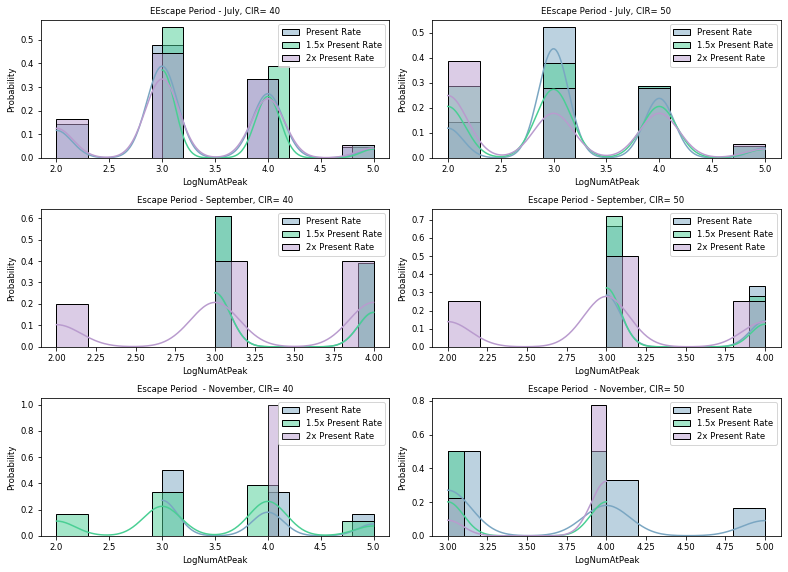

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  32   RatioNoWave :  0.40740740740740744
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.3333333

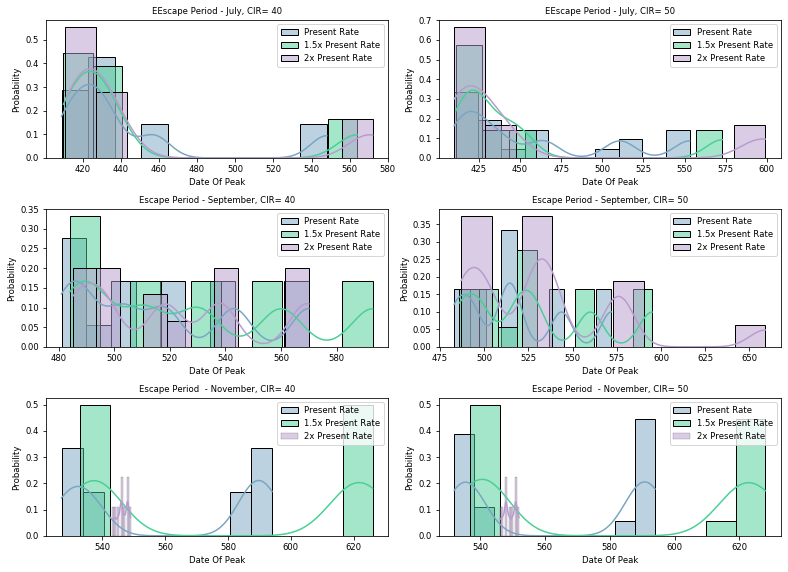

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


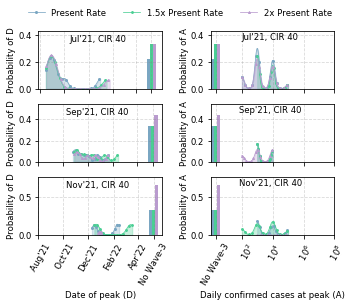

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

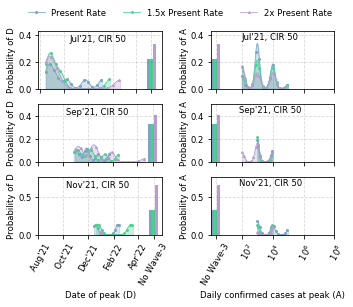

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  34   RatioNoWave :  0.37037037037037035
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54

<Figure size 432x288 with 0 Axes>

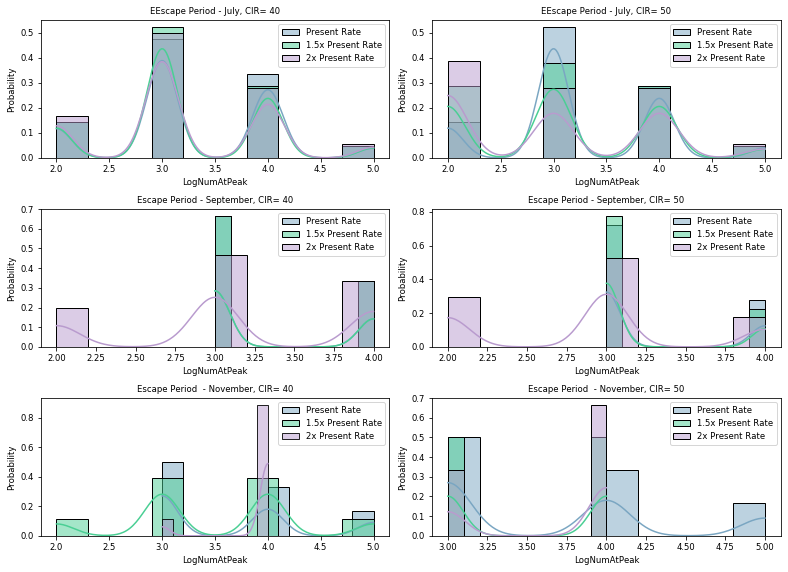

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  34   RatioNoWave :  0.37037037037037035
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333

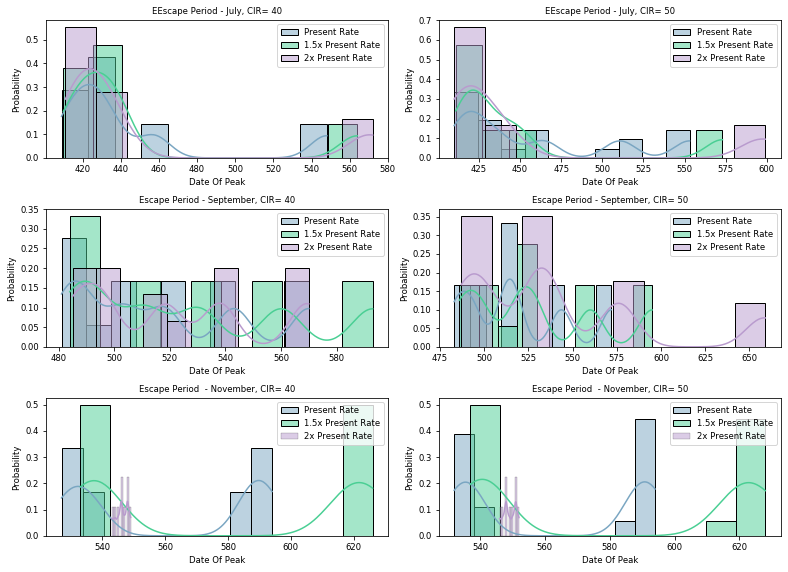

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


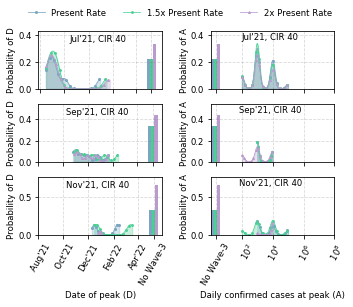

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

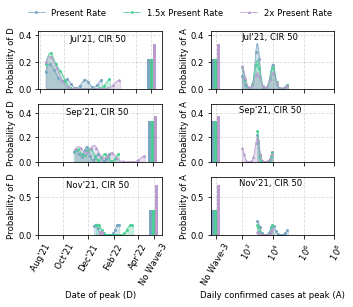

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  

<Figure size 432x288 with 0 Axes>

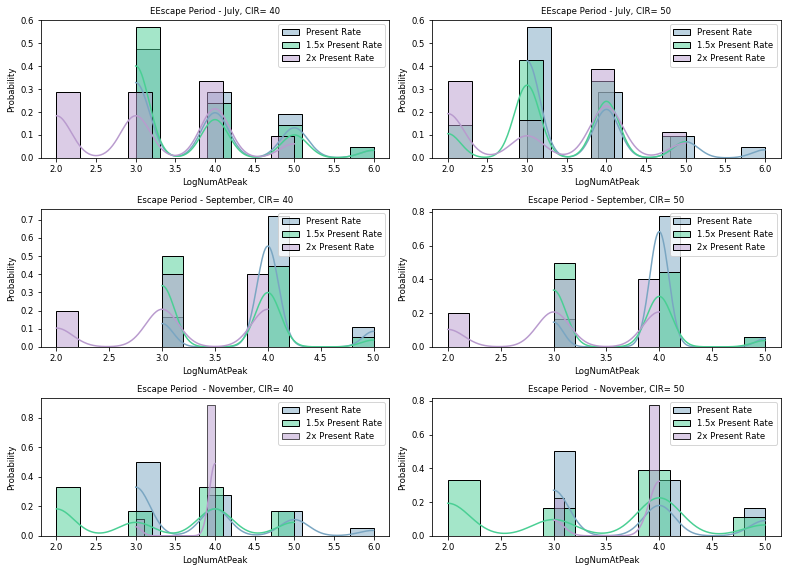

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.3333333333

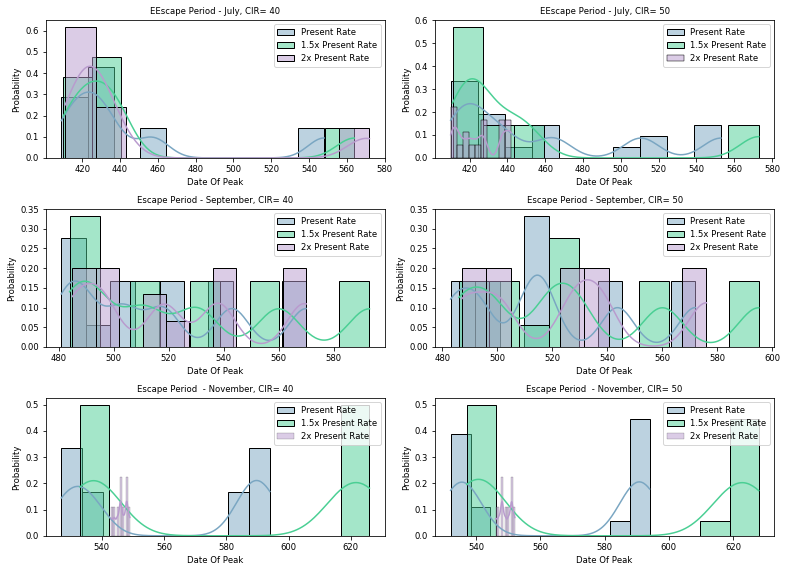

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


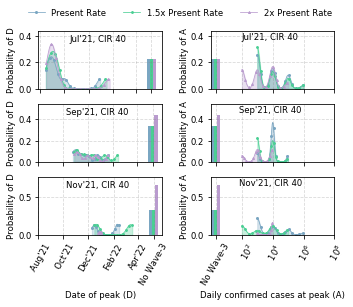

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

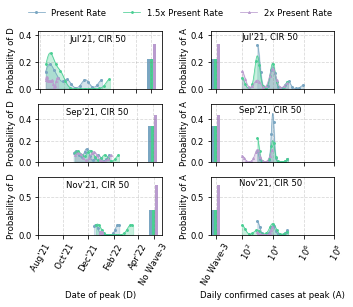

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  24   RatioNoWave :  0.5555555555555556
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  12   RatioNoWave :  0.7777777777777778
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  6   RatioNoWave :  0.8888888888888888
SOMETHING WRONG
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  6   RatioNoWave :  0.8888888888888888
SOMETHING WRONG
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.666666666

<Figure size 432x288 with 0 Axes>

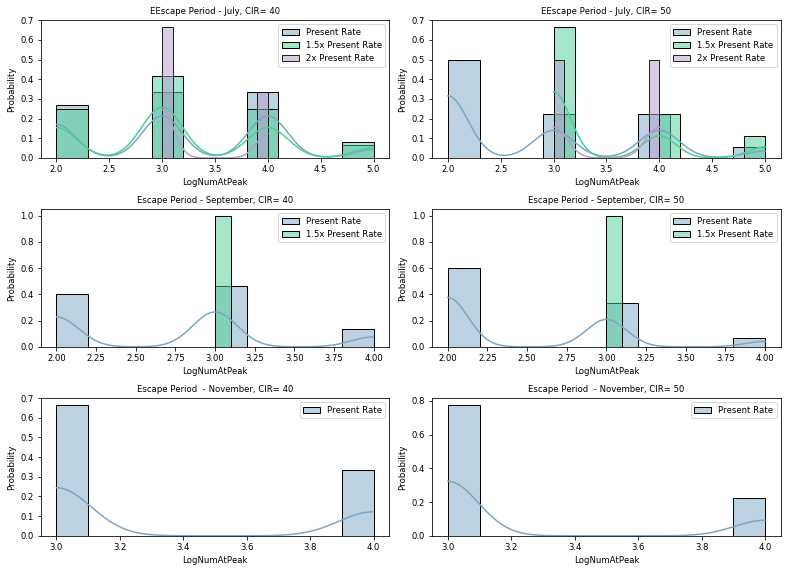

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  24   RatioNoWave :  0.5555555555555556
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  12   RatioNoWave :  0.7777777777777778
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  6   RatioNoWave :  0.8888888888888888
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  6   RatioNoWave :  0.8888888888888888
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667

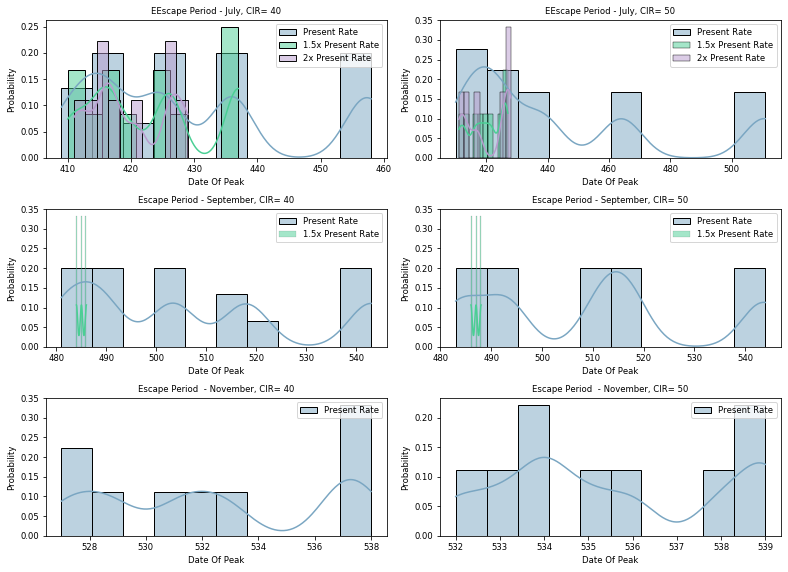

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


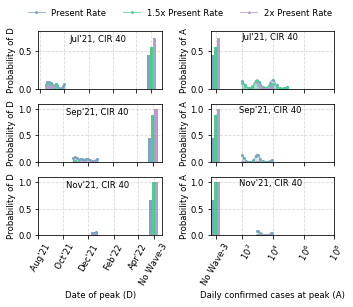

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

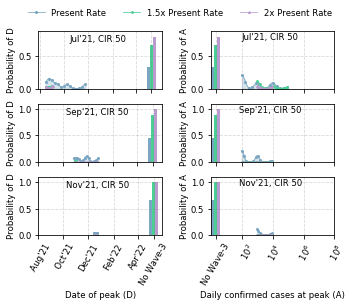

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  32   RatioNoWave :  0.40740740740740744
972
Total :  54  TruncatedRows :  24   RatioNoWave :  0.5555555555555556
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  12   RatioNoWave :  0.7777777777777778
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  8   RatioNoWave :  0.8518518518518519
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  Trunc

<Figure size 432x288 with 0 Axes>

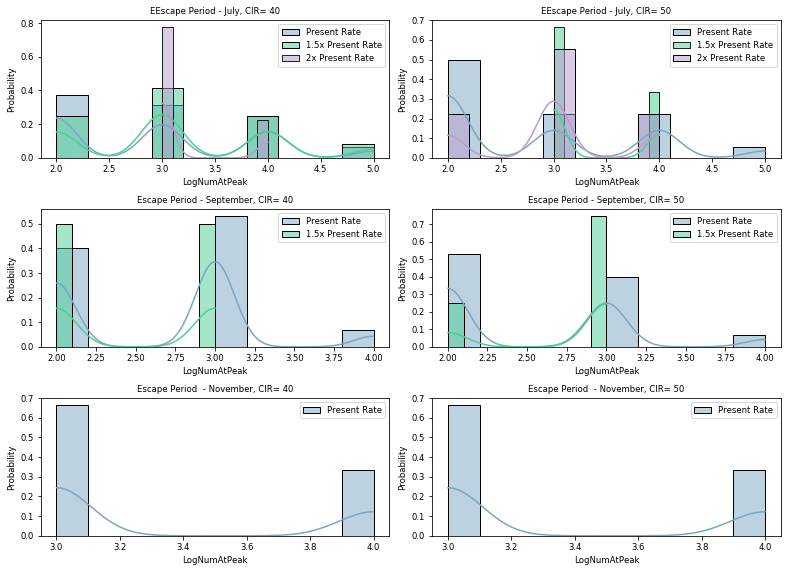

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  32   RatioNoWave :  0.40740740740740744
972
Total :  54  TruncatedRows :  24   RatioNoWave :  0.5555555555555556
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.6666666666666667
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  12   RatioNoWave :  0.7777777777777778
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  30   RatioNoWave :  0.4444444444444444
972
Total :  54  TruncatedRows :  8   RatioNoWave :  0.8518518518518519
972
Total :  54  TruncatedRows :  0   RatioNoWave :  1.0
SOMETHING WRONG
972
Total :  54  TruncatedRows :  18   RatioNoWave :  0.66666666666666

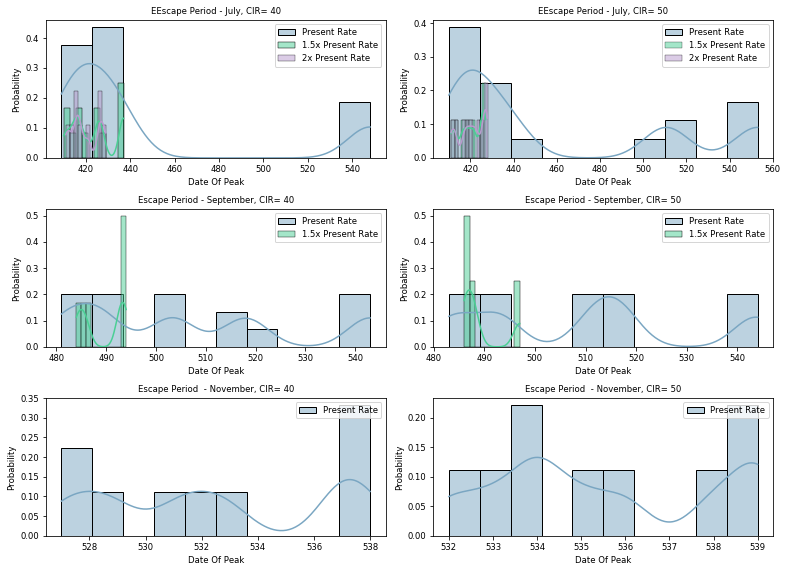

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


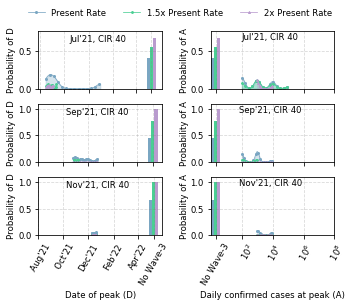

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

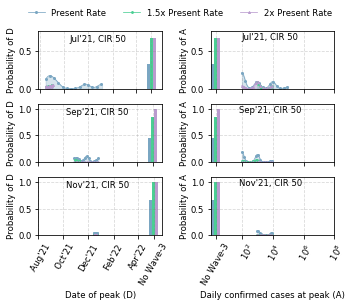

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54 

<Figure size 432x288 with 0 Axes>

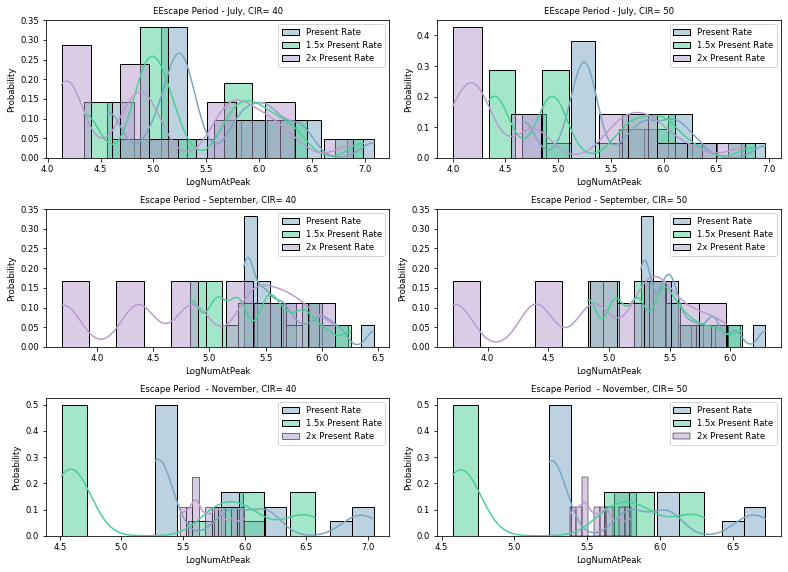

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.333333333

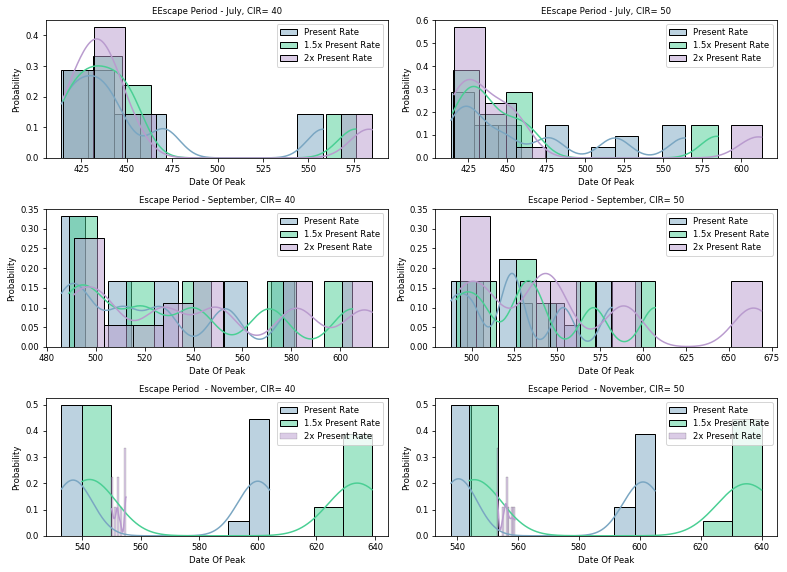

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


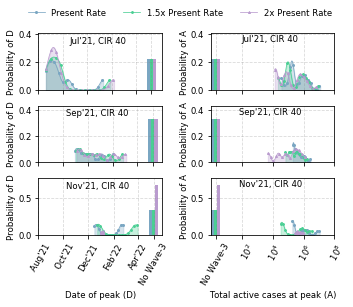

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

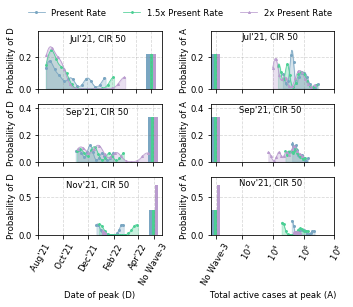

Size before GenData 1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  34   RatioNoWave :  0.37037037037037035
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54 

<Figure size 432x288 with 0 Axes>

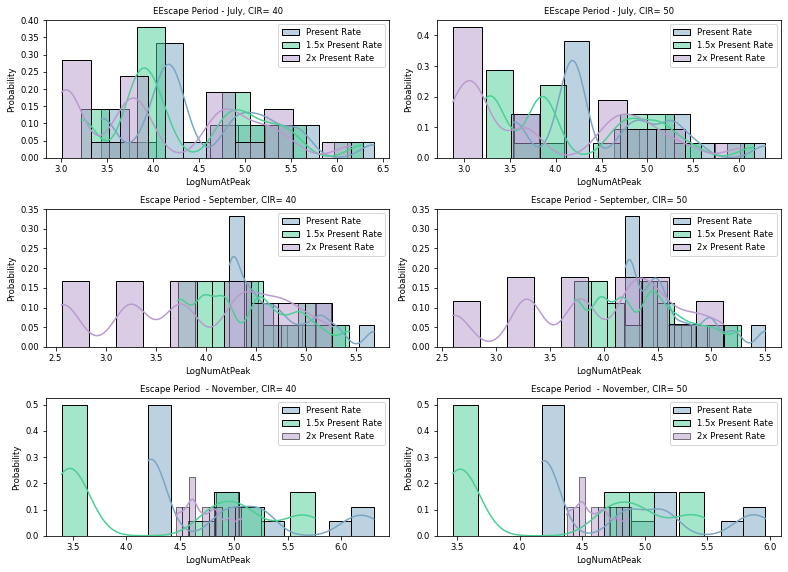

Size Aftr GenData 1:  972
Size before GenData1:  972
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  42   RatioNoWave :  0.2222222222222222
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.33333333333333337
972
Total :  54  TruncatedRows :  34   RatioNoWave :  0.37037037037037035
972
Total :  54  TruncatedRows :  36   RatioNoWave :  0.333333333

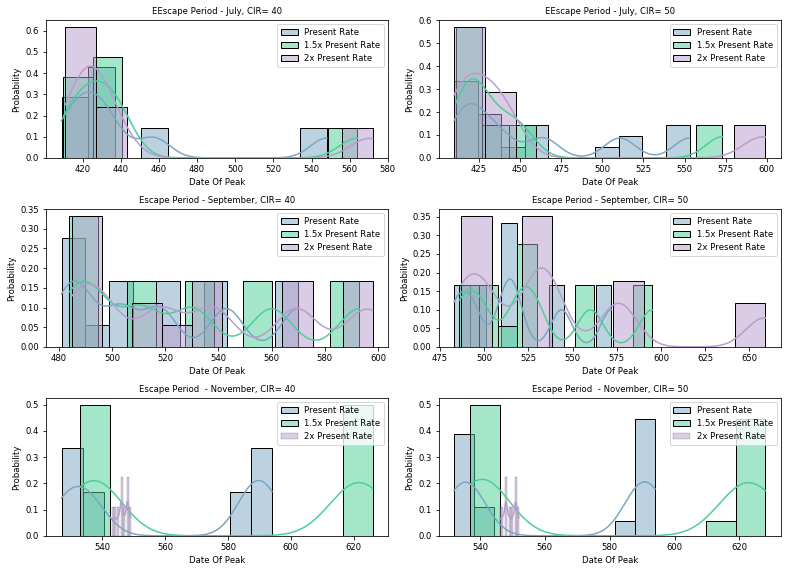

Size After GenData1:  972
CIOMES HERE
CIRV :  0
SavePlot Start
SavePlot End


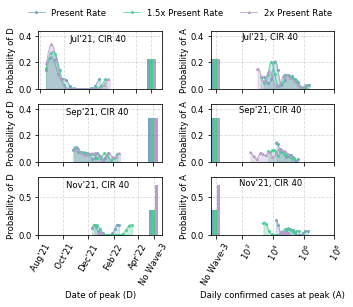

CIRV :  1
SavePlot Start
 SHOULD COME HERE
SavePlot End


<Figure size 432x288 with 0 Axes>

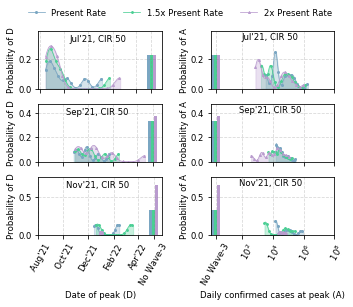

<Figure size 432x288 with 0 Axes>

In [116]:
###--- PLOTTING CELL ----     ####
### @@ CIR PLOT    ###

############### Function for Plotting #####################################

def plotDataFrame(DataFrameName,plotName):
#     DataFrameName = AddPeakInfo(DataFrameName,700,False)

    ## For Number of Cases    
    LinePLotVals_Cases = np.empty(shape=(3,2,3,200))
    LinePLotX_Cases = np.empty(shape=(3,2,3,200))

    ## For Date of Peak
    LinePLotVals = np.empty(shape=(3,2,3,200))
    LinePLotX = np.empty(shape=(3,2,3,200))
    
    
    ### For Storing Ratio of No Peak in Each cases
    NoWave_NumCases_Ratio = np.empty(shape = (3,2,3,1))
    Nowave_DOP_Ratio = np.empty(shape = (3,2,3,1))
    
    
    ### Data for Number at Peak
    print("Size before GenData 1: ", DataFrameName.shape[0])
    GenerateData(DataFrameName,'LogNumAtPeak',0.4,10,LinePLotVals_Cases,LinePLotX_Cases,NoWave_NumCases_Ratio,True)
    print("Size Aftr GenData 1: ", df_nucleation_total.shape[0])
    
    ### Data for Day of Peak
    print("Size before GenData1: ", DataFrameName.shape[0])
    GenerateData(DataFrameName,'Date Of Peak',0.4,10,LinePLotVals,LinePLotX,Nowave_DOP_Ratio,True)
    print("Size After GenData1: ", DataFrameName.shape[0])
    ### PLot the values in seperate plots
    CIR_plotter(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX, \
                NoWave_NumCases_Ratio,Nowave_DOP_Ratio,plotName)
    
#     SCATTER_plotter(df_active,plotName)

plotDataFrame(df_nucleation_11,"nucleation_11")
plotDataFrame(df_nucleation_18,"nucleation_18")
plotDataFrame(df_nucleation_45,"nucleation_45")
plotDataFrame(df_nucleation_60,"nucleation_60")
plotDataFrame(df_nucleation_60plus,"nucleation_60plus")
plotDataFrame(df_active,"TotalActive")
plotDataFrame(df_nucleation_total,"DailyConfirmed")



# #EXTRA -- REMOVE THEM
# LinePLotVals_Cases = np.empty(shape=(3,2,3,200))
# LinePLotX_Cases = np.empty(shape=(3,2,3,200))

# ## For Date of Peak
# LinePLotVals = np.empty(shape=(3,2,3,200))
# LinePLotX = np.empty(shape=(3,2,3,200))


# ### For Storing Ratio of No Peak in Each cases
# NoWave_NumCases_Ratio = np.empty(shape = (3,2,3,1))
# Nowave_DOP_Ratio = np.empty(shape = (3,2,3,1))

# HANDLES,LABELS = CIR_plotter(LinePLotVals_Cases,LinePLotX_Cases,LinePLotVals,LinePLotX, \
#                 NoWave_NumCases_Ratio,Nowave_DOP_Ratio,"test")

In [33]:
###--- FUNCTION DEFINITION ----     ####
### @@ SCATTER PLOTTER - NumCases   ###



###################### _____________________ SCATTER PLOTTTER ______________________________ ##############################
        
import warnings
warnings.filterwarnings('ignore')


def SCATTER_plotter(df_active,plotName):
    
    from scipy.stats import norm
    import numpy
    import sklearn
    from sklearn.neighbors import KernelDensity
    from sklearn.utils.fixes import parse_version
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import LeaveOneOut
    from sklearn import preprocessing
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(3,2,figsize=(11,8),sharex=True,sharey=True)

    ####### -- PLotter Parameters -- ######
    plt.rcParams["text.usetex"] = False
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Computer Modern"]
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    xtl = []
    xt = [396,427,457,488,518,549,580,608,639,670]   ## 1st days of the months hardcoded 
    xtl = ['   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','No wave-3']



    ## Set plotting parameters   -- Number at Peak
    markersizep = 1.9
    nTicks_C = 10
    startDay_C = 0
    endDay_C = 4e6
    xt_C = [1e-2,1e0,1e2,1e4,1e6,1e8,1e9]
    xtl_C = ["0",r"$10^{0}$",r"$10^{2}$",r"$10^{4}$",r"$10^{6}$",r"$10^{8}$",r"$10^{9}$"];


    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    JitterDate = 0.01
    JitterNum = 0.00000007
        #LinePLotVals = np.empty(shape=(4,4,4,200))
    #LinePLotVals = np.empty(shape=(4,4,4,200))

    for i in range(3):
        for j in range(2):
            df_kde=df_active.copy(deep=True)
            df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            df_kde.dropna(subset=['Date Of Peak'],inplace=True)
            
            
                
                
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                
                df_kdep = df_kdep[df_kdep['KDPLambda']=="SD_RARF" ]
                
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]   
                
                
                
                
                ## Add Jitters to the Current Dataframe
                stdev_DOP = JitterDate * (max(df_kde['Date Of Peak']) - min(df_kde['Date Of Peak']))
                df_kde['Date Of Peak'] =  df_kde['Date Of Peak'] + np.random.randn(len(df_kde['Date Of Peak'])) * stdev_DOP

                stdev_Case = JitterNum * (max(df_kde['Number At Peak']) - min(df_kde['Number At Peak']))
                df_kde['Number At Peak'] =  df_kde['Number At Peak'] + np.random.randn(len(df_kde['Number At Peak'])) * stdev_Case


                scat = sns.scatterplot(ax=ax[i,j],x='Date Of Peak',y='Number At Peak',data=df_kdep,y_jitter=0.2,color=colorVal[k],label=Vacc[k],marker=marker[k],s=80,palette=colorVal,markers=True )
    #             for line in range(0,df_kdep.shape[0]):
    #                  plt.text(df_kdep['Date Of Peak'][line]+0.2, df_kdep['Number At Peak'][line],df_kdep['Scenario'][line],size='large')

                plt.yscale(value="log")
            ax[i,j].set_xticks(xt);
            ax[i,j].set_xticklabels(xtl);
            ax[i,j].set_yticks(xt_C);
            ax[i,j].set_yticklabels(xtl_C);
            ax[i,j].tick_params(axis='x', rotation=60)
            ax[i,j].text(.48,.9,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,j].transAxes)
            ax[i,j].legend(title='Vaccination Rate',fancybox=True,ncol=2)
            handles, labels = ax[i,j].get_legend_handles_labels()
            ax[i,j].set_ylim([1e-2,1e9])
            ax[i,j].get_legend().remove()
    #             ax.legend(..., ncol=2)
            ax[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)

    ## Add the y labels in 1st Column
    ax[0,0].set_ylabel("Active cases at peak")
    ax[1,0].set_ylabel("Active cases at peak")
    ax[2,0].set_ylabel("Active cases at peak")

    ## Add the x axis labels in last row
    ax[2,0].set_xlabel("Date of peak")
    ax[2,1].set_xlabel("Date of peak")

    plt.legend(handles, labels, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-0.1,3.45))
    plt.subplots_adjust(wspace=0.04, hspace=0.085)

    name = "Scatter"
    name = name + "_" + plotName 
    plt.savefig(name + ".png",dpi=300,bbox_inches='tight')

    plt.show()



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


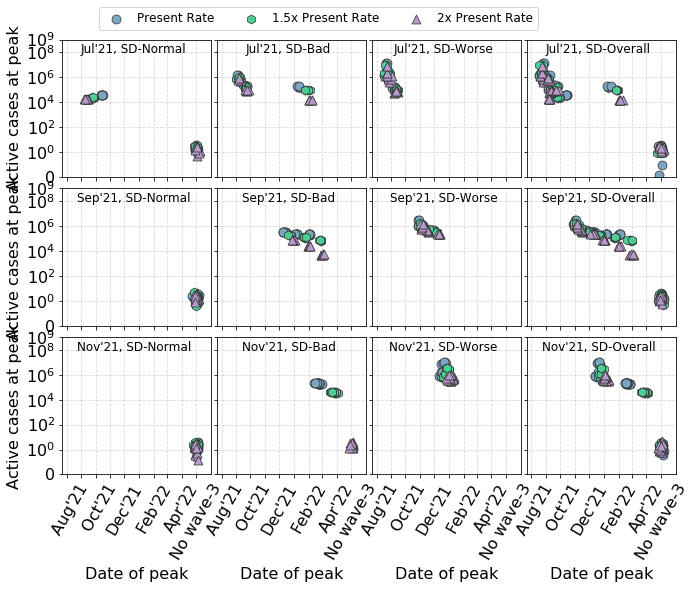

In [11]:
###--- PLOTTER ----     ####
### @@ GROUP SCATTER PLOTTER    ###



###################### _____________________GROUP SCATTER PLOTTERS ______________________________ ##############################
        
import warnings
warnings.filterwarnings('ignore')


def SCATTER_plotter_Group(df_active,plotName):
    
    from scipy.stats import norm
    import numpy
    import sklearn
    from sklearn.neighbors import KernelDensity
    from sklearn.utils.fixes import parse_version
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import LeaveOneOut
    from sklearn import preprocessing
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(3,4,figsize=(11,8),sharex=True,sharey=True)

    ####### -- PLotter Parameters -- ######
    plt.rcParams["text.usetex"] = False
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Computer Modern"]
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    xtl = []
    xt = [396,427,457,488,518,549,580,608,639,670]   ## 1st days of the months hardcoded 
    xtl = ['   Aug\'21','','   Oct\'21','','Dec\'21', '','Feb\'22','','Apr\'22','No wave-3']



    ## Set plotting parameters   -- Number at Peak
    markersizep = 1.9
    nTicks_C = 10
    startDay_C = 0
    endDay_C = 4e6
    xt_C = [1e-2,1e0,1e2,1e4,1e6,1e8,1e9]
    xtl_C = ["0",r"$10^{0}$",r"$10^{2}$",r"$10^{4}$",r"$10^{6}$",r"$10^{8}$",r"$10^{9}$"];


    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    KDP_lambda_Array = ["SD-Normal","SD-Bad","SD-Worse","SD-Overall"]
    BackGroundColor = ["#ffffff","#ffffff","#ffffff","#ffffff"]
    JitterDate = 0.01
    JitterNum = 0.00000007
        #LinePLotVals = np.empty(shape=(4,4,4,200))
    #LinePLotVals = np.empty(shape=(4,4,4,200))

    for i in range(3):      #Immune Escape
        for j in range(4):  #  SD Factor
            df_kde=df_active.copy(deep=True)
                        ## Add Jitters to the Current Dataframe
            stdev_DOP = JitterDate * (max(df_kde['Date Of Peak']) - min(df_kde['Date Of Peak']))
            df_kde['Date Of Peak'] =  df_kde['Date Of Peak'] + np.random.randn(len(df_kde['Date Of Peak'])) * stdev_DOP

            stdev_Case = JitterNum * (max(df_kde['Number At Peak']) - min(df_kde['Number At Peak']))
            df_kde['Number At Peak'] =  df_kde['Number At Peak'] + np.random.randn(len(df_kde['Number At Peak'])) * stdev_Case
            
            df_kde=df_kde[df_kde['CIR']=="CIR40"]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            
            if(j !=3):
                df_kde = df_kde[df_kde['KDPLambda']== KDP_lambda_name[j]]
            
            df_kde.dropna(subset=['Date Of Peak'],inplace=True)
            
            
                
                
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                
                
                
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]   
                
                


                scat = sns.scatterplot(ax=ax[i,j],x='Date Of Peak',y='Number At Peak',data=df_kdep,y_jitter=0.2,color=colorVal[k],label=Vacc[k],marker=marker[k],s=80,palette=colorVal,markers=True,edgecolor = "#333333" )
    #             for line in range(0,df_kdep.shape[0]):
    #                  plt.text(df_kdep['Date Of Peak'][line]+0.2, df_kdep['Number At Peak'][line],df_kdep['Scenario'][line],size='large')

                plt.yscale(value="log")
            ax[i,j].set_xticks(xt);
            ax[i,j].set_xticklabels(xtl);
            ax[i,j].set_yticks(xt_C);
            ax[i,j].set_yticklabels(xtl_C);
            ax[i,j].tick_params(axis='x', rotation=60)
            ax[i,j].text(.48,.9,KDPImm[i] +", "+ KDP_lambda_Array[j],horizontalalignment='center',transform=ax[i,j].transAxes)
            ax[i,j].legend(title='Vaccination Rate',fancybox=True,ncol=2)
            handles, labels = ax[i,j].get_legend_handles_labels()
            ax[i,j].set_ylim([1e-2,1e9])
            ax[i,j].get_legend().remove()
    #             ax.legend(..., ncol=2)
            ax[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            
            ## ABckground Color
            ax[i,j].set_facecolor(BackGroundColor[j]);

    ## Add the y labels in 1st Column
    ax[0,0].set_ylabel("Active cases at peak")
    ax[1,0].set_ylabel("Active cases at peak")
    ax[2,0].set_ylabel("Active cases at peak")

    ## Add the x axis labels in last row
    ax[2,0].set_xlabel("Date of peak")
    ax[2,1].set_xlabel("Date of peak")
    ax[2,2].set_xlabel("Date of peak")
    ax[2,3].set_xlabel("Date of peak")

    plt.legend(handles, labels, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-1.4,3.45))
    plt.subplots_adjust(wspace=0.04, hspace=0.085)

    name = "Scatter"
    name = name + "_" + plotName 
    plt.savefig(name + ".png",dpi=300,bbox_inches='tight')

    plt.show()

SCATTER_plotter_Group(df_active,"TotalActive_Group")

In [12]:
###--- PLOTTER ----     ####
### @@ AgeWise GROUP SCATTER PLOTTER    ###

###################### _____________________GROUP SCATTER PLOTTERS [[[ AGE WISE ]]]______________________________ ##############################
        
import warnings
warnings.filterwarnings('ignore')


def SCATTER_plotter_Group_AgeWise(df_active,plotName):
    
    from scipy.stats import norm
    import numpy
    import sklearn
    from sklearn.neighbors import KernelDensity
    from sklearn.utils.fixes import parse_version
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import LeaveOneOut
    from sklearn import preprocessing
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(1,1,figsize=(11,8),sharex=True,sharey=True)

    ####### -- PLotter Parameters -- ######
    plt.rcParams["text.usetex"] = False
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Computer Modern"]
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    xtl = []
    xt = [396,427,457,488,518,549,580,608,639,670]   ## 1st days of the months hardcoded 
    xtl = ['   Aug\'21','','   Oct\'21','','Dec\'21', '','Feb\'22','','Apr\'22','No wave-3']



    ## Set plotting parameters   -- Number at Peak
    markersizep = 1.9
    nTicks_C = 10
    startDay_C = 0
    endDay_C = 4e6
    xt_C = [1e-2,1e0,1e2,1e4,1e6,1e8,1e9]
    xtl_C = ["0",r"$10^{0}$",r"$10^{2}$",r"$10^{4}$",r"$10^{6}$",r"$10^{8}$",r"$10^{9}$"];


    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    KDP_lambda_Array = ["SD-Normal","SD-Bad","SD-Worse","SD-Overall"]
    JitterDate = 0.01
    JitterNum = 0.00000007
        #LinePLotVals = np.empty(shape=(4,4,4,200))
    #LinePLotVals = np.empty(shape=(4,4,4,200))

    for i in range(3):      #Immune Escape
        for j in range(4):  #  SD Factor
            df_kde=df_active.copy(deep=True)
                        ## Add Jitters to the Current Dataframe
            stdev_DOP = JitterDate * (max(df_kde['Date Of Peak']) - min(df_kde['Date Of Peak']))
            df_kde['Date Of Peak'] =  df_kde['Date Of Peak'] + np.random.randn(len(df_kde['Date Of Peak'])) * stdev_DOP

            stdev_Case = JitterNum * (max(df_kde['Number At Peak']) - min(df_kde['Number At Peak']))
            df_kde['Number At Peak'] =  df_kde['Number At Peak'] + np.random.randn(len(df_kde['Number At Peak'])) * stdev_Case
            
            df_kde=df_kde[df_kde['CIR']=="CIR40"]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            
            if(j !=3):
                df_kde = df_kde[df_kde['KDPLambda']== KDP_lambda_name[j]]
            
            df_kde.dropna(subset=['Date Of Peak'],inplace=True)
            
            
                
                
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                
                
                
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]   
                
                


                scat = sns.scatterplot(ax=ax[i,j],x='Date Of Peak',y='Number At Peak',data=df_kdep,y_jitter=0.2,color=colorVal[k],label=Vacc[k],marker=marker[k],s=80,palette=colorVal,markers=True,edgecolor = "#333333" )
    #             for line in range(0,df_kdep.shape[0]):
    #                  plt.text(df_kdep['Date Of Peak'][line]+0.2, df_kdep['Number At Peak'][line],df_kdep['Scenario'][line],size='large')

                plt.yscale(value="log")
            ax[i,j].set_xticks(xt);
            ax[i,j].set_xticklabels(xtl);
            ax[i,j].set_yticks(xt_C);
            ax[i,j].set_yticklabels(xtl_C);
            ax[i,j].tick_params(axis='x', rotation=60)
            ax[i,j].text(.48,.9,KDPImm[i] +", "+ KDP_lambda_Array[j],horizontalalignment='center',transform=ax[i,j].transAxes)
            ax[i,j].legend(title='Vaccination Rate',fancybox=True,ncol=2)
            handles, labels = ax[i,j].get_legend_handles_labels()
            ax[i,j].set_ylim([1e-2,1e9])
            ax[i,j].get_legend().remove()
    #             ax.legend(..., ncol=2)
            ax[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            
            ## ABckground Color
            ax[i,j].set_facecolor(BackGroundColor[j]);

    ## Add the y labels in 1st Column
    ax[0,0].set_ylabel("Active cases at peak")
    ax[1,0].set_ylabel("Active cases at peak")
    ax[2,0].set_ylabel("Active cases at peak")

    ## Add the x axis labels in last row
    ax[2,0].set_xlabel("Date of peak")
    ax[2,1].set_xlabel("Date of peak")
    ax[2,2].set_xlabel("Date of peak")
    ax[2,3].set_xlabel("Date of peak")

    plt.legend(handles, labels, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-1.4,3.45))
    plt.subplots_adjust(wspace=0.04, hspace=0.085)

    name = "Scatter"
    name = name + "_" + plotName 
    plt.savefig(name + ".png",dpi=300,bbox_inches='tight')

    plt.show()



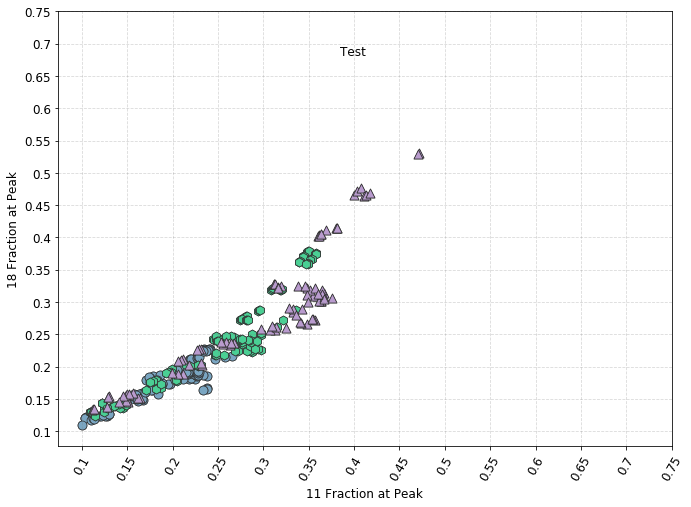

In [13]:
###--- PLOTTER ----     ####
### @@ AgeWise  SCATTER PLOTTER    ###
# Normal Agewise Scatter Plot
###################### _____________________GROUP SCATTER PLOTTERS [[[ AGE WISE ]]]______________________________ ##############################
        
import warnings
warnings.filterwarnings('ignore')
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def SCATTER_plotter_AgeWise(df_active,x_axis,y_axis,plotName,NeedsJitter):
        
    fig, ax = plt.subplots(figsize=(11,8))
    

    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


    xt = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75]
    xtl = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75]

    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    KDP_lambda_Array = ["SD-Normal","SD-Bad","SD-Worse","SD-Overall"]
    JitterDate = 0.01
    JitterNum = 0.00000007
    

    ## Copy the DataFrame 
    df_kde=df_active.copy(deep=True)
    
    ## Add Jitters to the Current Dataframe
    if(NeedsJitter):
        stdev_DOP = JitterDate * (max(df_kde['Date Of Peak']) - min(df_kde['Date Of Peak']))
        df_kde['Date Of Peak'] =  df_kde['Date Of Peak'] + np.random.randn(len(df_kde['Date Of Peak'])) * stdev_DOP

        stdev_Case = JitterNum * (max(df_kde['Number At Peak']) - min(df_kde['Number At Peak']))
        df_kde['Number At Peak'] =  df_kde['Number At Peak'] + np.random.randn(len(df_kde['Number At Peak'])) * stdev_Case

    ## Filter out the No Peak Cases
    df_kde = df_kde[df_kde["Date Of Peak"] != NOWAVEPEAKDATE]
    

    for k in range(3):
        df_kdep = df_kde[df_kde['Vaccine Rate']==KDP_c_p_name[k]]   


        scat = sns.scatterplot(x=x_axis,y=y_axis,data=df_kdep,y_jitter=0.2,color=colorVal[k],label=Vacc[k],marker=marker[k],s=80,palette=colorVal,markers=True,edgecolor = "#333333" )
#             for line in range(0,df_kdep.shape[0]):
#                  plt.text(df_kdep['Date Of Peak'][line]+0.2, df_kdep['Number At Peak'][line],df_kdep['Scenario'][line],size='large')

        
    plt.xticks(xt,xtl);
    plt.yticks(xt,xtl);
    ax.tick_params(axis='x', rotation=60)
    ax.text(.48,.9,"Test",horizontalalignment='center',transform=ax.transAxes)
    plt.legend(title='Vaccination Rate',fancybox=True,ncol=2)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
#             ax.legend(..., ncol=2)
    ax.grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
    ax.grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)


    ## Add the y labels in 1st Column
    ax.set_ylabel("18 Fraction at Peak")

    ## Add the x axis labels in last row
    ax.set_xlabel("11 Fraction at Peak")


#     plt.legend(handles, labels, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-1.4,3.45))

    name = "Scatter"
    name = name + "_" + plotName 
    plt.savefig(name + ".png",dpi=300,bbox_inches='tight')

    plt.show()

SCATTER_plotter_AgeWise(df_nucleation_total,"11FracAtPeak","18FracAtPeak","scatter_age11v18",False)

MAx Val, norm :  1.0


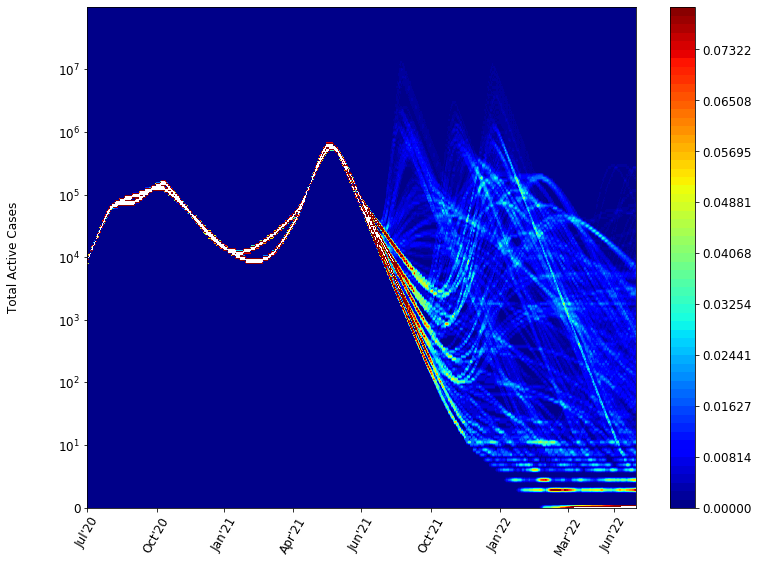

In [14]:
###--- PLOTTING CELL ----     ####
### @@ TIMESERIES PLOT    ###



####### Create a TIMESERIES PLOT ###########################
import matplotlib.pyplot as plt
## get Distribution of Data for each of the Rows ( Prefereble in Log Scale )
###

def Histogram(array,bins,start,end,result):
    
    lenX = len(array);
    
    binWidth = (end -  start)/bins;

    for i in range(lenX):
        val    = array[i];
        binNo  = int(val/binWidth);
        
        result[binNo]+=1;
    
    return result;

def TimeSeriesPlotter(DataFrame,plotname,PlottingParameters, LogParam):

    N_days_Experimentation  = ROWS
    
    ## Obtain the parameters from Disct
    Bandwidth = PlottingParameters["bandwidth"]
    N_bins    = PlottingParameters["N_bins"]
    start     = PlottingParameters["Start"]
    end       = PlottingParameters["End"]

    TimeSeriesData = np.zeros([N_bins,ROWS+1],dtype=np.float)
    
    ## Compute the distribution for each of the data

    for i in range(ROWS+1):
        #Get the Data of that Col
        data = DataFrame[[i]].copy(deep=True)
        data = data+1;   ##### To remove the log errors whle trying to operate on zero
        data = data.to_numpy().flatten()

        if(LogParam == True):
            data = np.log10(data)
        
        # Plot a SNS Histogram and obtain the kdeline
        
        Histogram(data,N_bins,start,end,TimeSeriesData[:,i]);
        
#         print(TimeSeriesData[:,i])
        
#         if(sum(TimeSeriesData[:,i]) != 972):
#             print(" Some Thing Wrong")
        
    
    ## Normalise t
    MaxValue       = TimeSeriesData.max()
    MinValue       = TimeSeriesData.min()
    TimeSeriesData = TimeSeriesData/MaxValue
    
    MaxValueNormalised = TimeSeriesData.max()
    print("MAx Val, norm : ", MaxValueNormalised)
    ## Plot the Data
    X = np.linspace(0,ROWS,ROWS+1)
    Y = np.linspace(start,end,N_bins)
    levels = np.linspace(0,0.08,60)
    
    origin = 'lower'
    
    yt = [0,1,2,3,4,5,6,7]
    ytl = xtl_C = ["0",r"         $10^{1}$",r"         $10^{2}$",r"    $10^{3}$",r"    $10^{4}$",r"    $10^{5}$",r"    $10^{6}$",r"    $10^{7}$"];
    
    xt = [0,92,182,274,364,457,549,639,700]
    xtl = ["Jul'20","Oct'20", "Jan'21","Apr'21","Jun'21","Oct'21","Jan'22","Mar'22","Jun'22"]
    
    plt.figure(figsize=(11,8))
    ax = plt.contourf(X,Y,TimeSeriesData,levels,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                      origin='upper',cmap='jet'
                  )
    ax.cmap.set_under('red')
    ax.cmap.set_over('cyan')
    
    plt.ylabel("Total Active Cases")
    plt.yticks(yt,ytl)
    plt.colorbar(ax)
    plt.xticks(xt,xtl)
    plt.tick_params(axis='x', rotation=60);
    
    plt.tight_layout()
    
##Plotting parameters
        
PlottingParameters = {
    'bandwidth': 0.3,
    'N_bins': 200,
    'Start' : 0,
    'End'   : 8
}       
        
TimeSeriesPlotter(df_active,"timeSeries_DailyActive",PlottingParameters,True)

Before Plot
After Plot


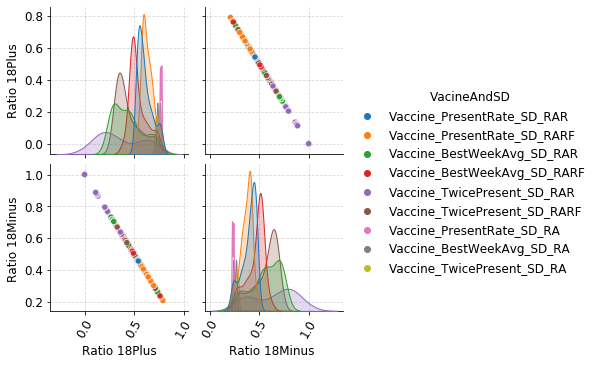

In [15]:
### PLOTTER SCRIPT #####
## Pair Plot 5-Tuple ###
## 5*5 Pair #

def sns_PairPlot(DataFrame,VarArray,plotTitle,CustomXTicks):
    


    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


    xt = [0,0.1,0.2,0.3,0.4,0.5,0.6]
    xtl = [0,0.1,0.2,0.3,0.4,0.5,0.6]

    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
#     XLabel = ["Ratio 0-11 Year","Ratio 11-18 Year","Ratio 18-45 Year","Ratio 45-60 Year","Ratio 60+"]
#     YLabel = ["Ratio 0-11 Year","Ratio 11-18 Year","Ratio 18-45 Year","Ratio 45-60 Year","Ratio 60+"]
    XLabel = ["Ratio 18Plus" , "Ratio 18Minus "]
    YLabel = ["Ratio 18Plus" , "Ratio 18Minus "]
    KDP_lambda_Array = ["SD-Normal","SD-Bad","SD-Worse","SD-Overall"]
    
    DataFrame = DataFrame[DataFrame["Date Of Peak"] != NOWAVEPEAKDATE].copy(deep=True)
    
    DataFrame["VacineAndSD"] = DataFrame["Vaccine Rate"] + "_" + DataFrame["SD"]
    
    print("Before Plot")
#     g=sns.pairplot(data=DataFrame,vars=VarArray, hue='SD',markers=marker,palette=colorVal,plot_kws={"s": 60})
    g=sns.pairplot(data=DataFrame,vars=VarArray, hue="VacineAndSD")
    
    handles = g._legend_data.values()
    labels = g._legend_data.keys()
#     g._legend.remove()
    
    ### X labels
    for j in range(len(VarArray)):
        g.axes[len(VarArray)-1][j].set_xlabel(XLabel[j])
        g.axes[len(VarArray)-1][j].tick_params(axis='x', rotation=60);
        
        
    
    ### Y labels
    for i in range(len(VarArray)):
        g.axes[i][0].set_ylabel(XLabel[i])
    
    for i in range(len(VarArray)):
        for j in range(len(VarArray)):
            if(CustomXTicks):
                g.axes[i][j].set_xticks(xt);
            g.axes[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            g.axes[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
    
            
        
    
    plt.grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
    plt.grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
    
    
#     plt.legend(handles, labels, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-1.5,5.65)

#     plt.legend(handles, labels, loc='upper center',title='',ncol=3,bbox_to_anchor=(-.5,-1.98))
               
#     plt.tight_layout()
    
    name = "PairPlot_" + plotTitle + ".png"
    plt.savefig(name,dpi=400,bbox_inches='tight')
    
    print("After Plot")
    

    plt.show()
    pass;
## 
# Array = ['11FracAtPeak','18FracAtPeak','45FracAtPeak','60FracAtPeak','60plusFracAtPeak']

# sns_PairPlot(df_nucleation_total,Array,"allAgeGroup_withoutXticks",False)
# sns_PairPlot(df_nucleation_total,Array,"allAgeGroup",True)

Array = ['18plusFracAtPeak','18minusFracAtPeak']
sns_PairPlot(df_nucleation_total,Array,"AgeGroup_18",False)


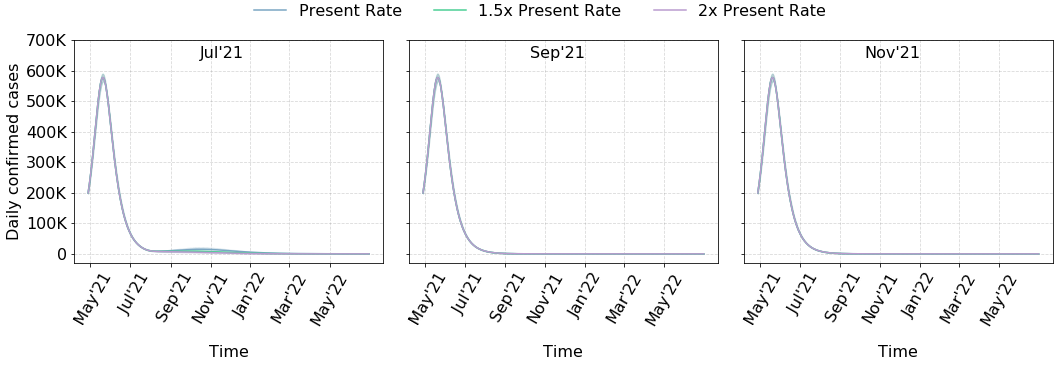

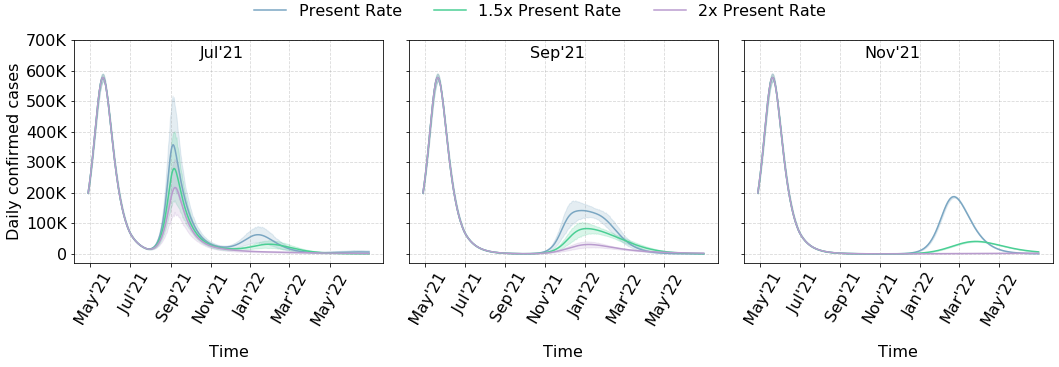

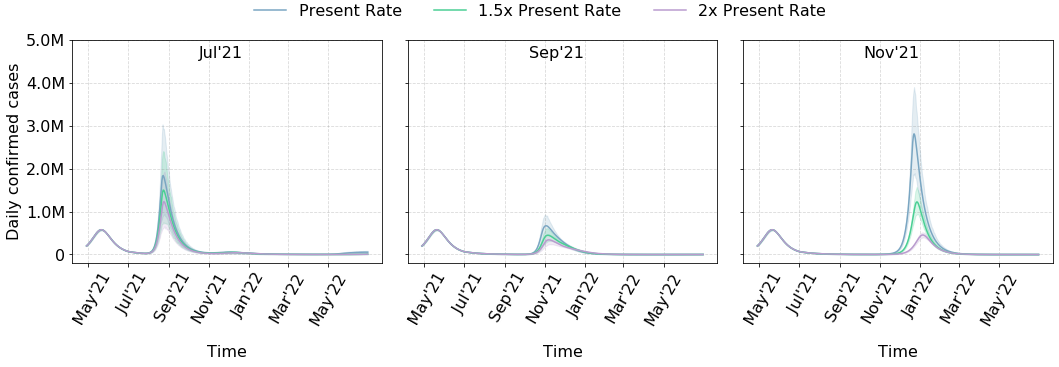

In [119]:
###### PLOTTER SCRIPT ################
### REL PLot   #####


### Reshape DataFrame
def Relplotter(DataFrame, SD_Col_Val, plotExtension,ciBool):
    df_melt = df_active.copy(deep=True)
    listCol = list(df_active.columns.values)[731:]
    df_melt = df_melt.melt(id_vars=listCol, \
                var_name="Day", \
                value_name="Total")

    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.labelsize']=16
    

    plt.rcParams["font.serif"]
    SMALL_SIZE = 16
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    ### PLotting Parameters
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    ## Filter the Data
    df_melt=df_melt[df_melt['Day']>300]
    df_melt=df_melt[df_melt['SD']==SD_Col_Val]


    if(ciBool):
    ### Plotting Script
        relPlot = sns.relplot(data=df_melt, kind="line",
                            x="Day", y="Total",
                            hue="Vaccine Rate",col="KDPwsat2",palette=colorVal,facet_kws=dict(legend_out=False))
    else:
        relPlot = sns.relplot(data=df_melt, kind="line",ci=None,
                            x="Day", y="Total",
                            hue="Vaccine Rate",col="KDPwsat2",palette=colorVal,facet_kws=dict(legend_out=False))

#     handles = relPlot._legend.
#     labels = relPlot._legend_data.keys()
#     print(labels)
#     print(max(df_melt['Total']))
    h,l = relPlot.axes[0][0].get_legend_handles_labels()
    relPlot.axes[0][0].legend_.remove()


    ## yTicks
    yt = [0,1,2,3,4,5,6,7,8]

    ## Xticks
#     xt = [304,335,365,396,427,457,488,518,549,580,608,639,670,700]   ## 1st days of the months hardcoded 
#     xtl = ['   May\'21','   Jun\'21','   Jul\'21','   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','May\'22','Jun\'22']

    xt = [304,365,427,488,549,608,670]   ## 1st days of the months hardcoded 
    xtl = ['   May\'21','   Jul\'21','   Sep\'21','Nov\'21', 'Jan\'22','Mar\'22','May\'22']

    SDArr = {"SD_RA" : 0,
            "SD_RAR" : 0.1,
            "SD_RARF": 0.2}

    relPlot.axes[0][0].set_ylabel("Daily confirmed cases")
    k = relPlot.axes[0][0].get_yticks()
    
    def YTicks(array):
        array = [item for item in array if item >= 0]
        Ylabel = []
        for i in range(len(array)):
            if(array[i]/1000000 >=1 ): # Millions
                Ylabel.append(str(array[i]/1000000) + "M")

            elif(array[i] !=0):                       # Thousands
                Ylabel.append(str((int(array[i]/1000))) + "K")
            else:
                Ylabel.append("0")
        return array,Ylabel
    yt,ytl = YTicks(k)
    

    for i in range(3):
        relPlot.axes[0][i].set_xlabel("Time")                   ## Xlabel
        relPlot.axes[0][i].set_xticks(xt)                       ## XTicks 
        relPlot.axes[0][i].set_xticklabels(xtl)                 ## XTick Labels
        relPlot.axes[0][i].tick_params(axis='x', rotation=60);  ## XTicks Rotation
        relPlot.axes[0][i].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
        relPlot.axes[0][i].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
        relPlot.axes[0][i].set_yticks(yt)
        relPlot.axes[0][i].text(.48,.92,KDPImm[i],horizontalalignment='center',transform=relPlot.axes[0][i].transAxes)
        relPlot.axes[0][i].set_title("")
        relPlot.axes[0][i].spines['right'].set_visible(True)
        relPlot.axes[0][i].spines['top'].set_visible(True)


    relPlot.axes[0][0].set_yticks(yt)                       ## YTicks 
    relPlot.axes[0][0].set_yticklabels(ytl)                 ## YTick Labels
    
    l = Vacc
    relPlot.fig.legend(h, l, loc='upper center',title='',ncol=3,bbox_to_anchor=(0.5,1.05), frameon=False)
    
    name = "Relplot_" + plotExtension + "1.png"
    plt.tight_layout()
    plt.savefig(name,dpi=300,bbox_inches='tight');
    
Relplotter(df_active,"SD_RA","SD_RA",True)
Relplotter(df_active,"SD_RAR","SD_RAR",True)
Relplotter(df_active,"SD_RARF","SD_RARF",True)

In [121]:
###### COMPUTE #####################
## AgeWise Data for RELPLOT ##

df_nucleation_18minus = df_nucleation_18.iloc[:,:736].copy(deep=True)
df_nucleation_18minus.iloc[:,:731] += df_nucleation_11.iloc[:,:731]
df_nucleation_18plus = df_nucleation_45.iloc[:,:736].copy(deep=True)
df_nucleation_18plus.iloc[:,:731] +=  df_nucleation_60.iloc[:,:731] 

df_melt_18plus = df_nucleation_18plus.copy(deep=True)
listCol = list(df_nucleation_18plus.columns.values)[731:]
df_melt_18plus = df_melt_18plus.melt(id_vars=listCol, \
            var_name="Day", \
            value_name="18Plus")
df_melt1_18minus = df_nucleation_18minus.copy(deep=True)
listCol = list(df_nucleation_18minus.columns.values)[731:]
df_melt_18minus = df_melt1_18minus.melt(id_vars=listCol, \
            var_name="Day", \
            value_name="18Minus")
df_melt_60plus = df_nucleation_60plus.copy(deep=True)
listCol = list(df_melt_60plus.columns.values)[731:]
df_melt_60plus = df_melt_60plus.melt(id_vars=listCol, \
            var_name="Day", \
            value_name="60Plus")

# Copy all contents to single dataframe
df_nucleation_melt_Age = df_melt_18minus.copy(deep=True)
df_nucleation_melt_Age["18Plus"] = df_melt_18plus["18Plus"].to_list()
df_nucleation_melt_Age["60Plus"] = df_melt_60plus["60Plus"].to_list()
#dump = df_melt_Age_18.copy(deep=True)

## Melt the final Dataframe
listCol = list(df_nucleation_melt_Age.columns.values)[:6]
df_nucleation_melt_Age = df_nucleation_melt_Age.melt(id_vars=listCol, \
            var_name="AgeGroup", \
            value_name="AgeTotal")



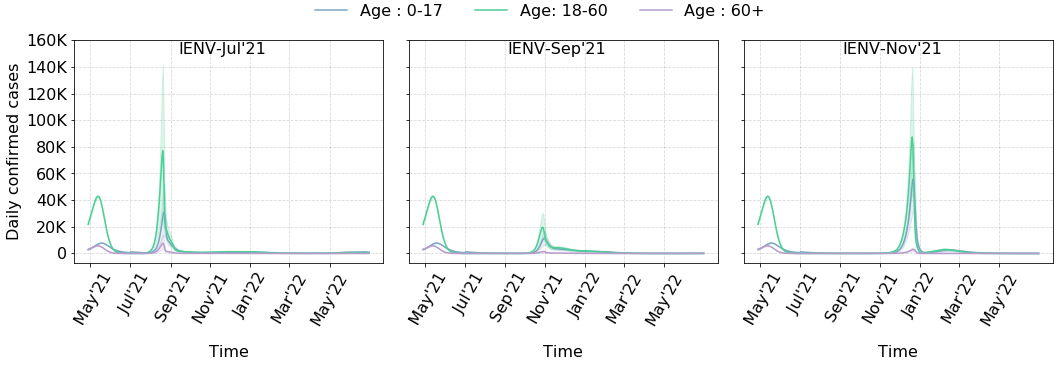

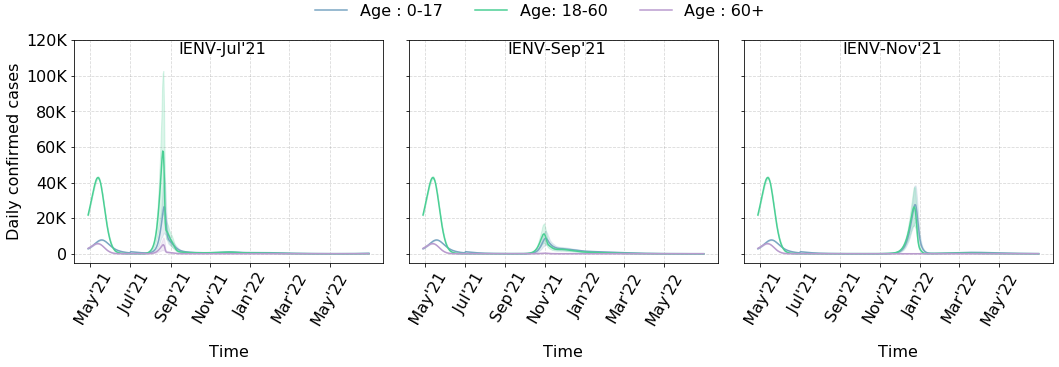

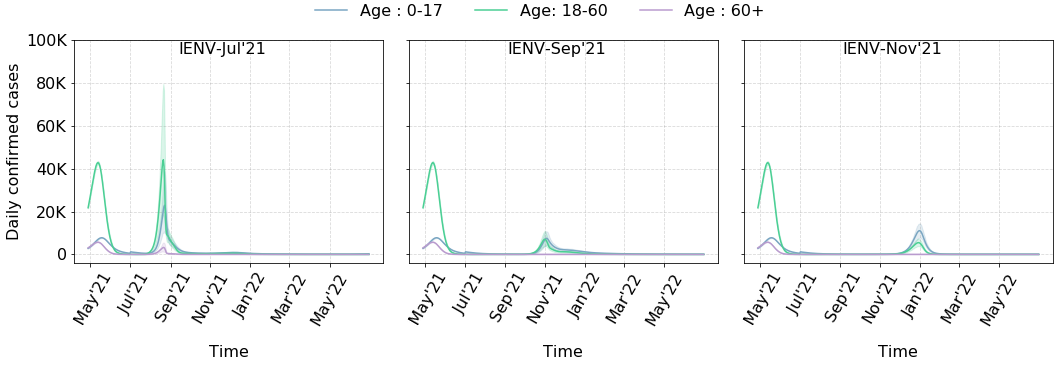

In [125]:
#### PLOTTER SCRIPT ###########
### Agewise Relplot #########



def agewise_Relplot(dataframe,plotExtension,VAC_RATE,ciFlag):
    dat = dataframe.copy(deep=True)
    dat = dat[dat["Day"] > 300]
    dat = dat[dat["Vaccine Rate"] == VAC_RATE]

    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.labelsize']=16

    plt.rcParams["font.serif"]
    SMALL_SIZE = 16
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    Age=["Age : 0-17","Age: 18-60","Age : 60+"]
    Sd=["SD-Normal","SD-Bad","SD-Worse"]
    KDPImm=["IENV-Jul'21","IENV-Sep'21","IENV-Nov'21"]
    
    if(not ciFlag):
        relPlot = sns.relplot(data=dat, kind="line",ci=None, \
                                x="Day", y="AgeTotal", \
                                hue="AgeGroup",col="KDPwsat2",label=Vacc,palette=colorVal,facet_kws=dict(legend_out=False))
    else:
        relPlot = sns.relplot(data=dat, kind="line", \
                                x="Day", y="AgeTotal", \
                                hue="AgeGroup",col="KDPwsat2",label=Vacc,palette=colorVal,facet_kws=dict(legend_out=False))
    
    h,l = relPlot.axes[0][0].get_legend_handles_labels()
    relPlot.axes[0][0].legend_.remove()
    
    yt = [0,1,2,3,4,5,6,7,8]

    ## Xticks
    xt = [304,365,427,488,549,608,670]   ## 1st days of the months hardcoded 
    xtl = ['   May\'21','   Jul\'21','   Sep\'21','Nov\'21', 'Jan\'22','Mar\'22','May\'22']
    
    SDArr = {"SD_RA" : 0,
            "SD_RAR" : 0.1,
            "SD_RARF": 0.2}

    relPlot.axes[0][0].set_ylabel("Daily confirmed cases")
    k = relPlot.axes[0][0].get_yticks()

    def YTicks(array):
        array = [item for item in array if item >= 0]
        Ylabel = []
        for i in range(len(array)):
            if(array[i]/1000000 >=1 ): # Millions
                Ylabel.append(str(array[i]/1000000) + "M")

            elif(array[i] !=0):                       # Thousands
                Ylabel.append(str((int(array[i]/1000))) + "K")
            else:
                Ylabel.append("0")
        return array,Ylabel
    yt,ytl = YTicks(k)


    for i in range(3):
        relPlot.axes[0][i].set_xlabel("Time")                   ## Xlabel
        relPlot.axes[0][i].set_xticks(xt)                       ## XTicks 
        relPlot.axes[0][i].set_xticklabels(xtl)                 ## XTick Labels
        relPlot.axes[0][i].tick_params(axis='x', rotation=60);  ## XTicks Rotation
        relPlot.axes[0][i].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
        relPlot.axes[0][i].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
        relPlot.axes[0][i].set_yticks(yt)
        relPlot.axes[0][i].text(.48,.94,KDPImm[i],horizontalalignment='center',transform=relPlot.axes[0][i].transAxes)
        relPlot.axes[0][i].set_title("")
        relPlot.axes[0][i].spines['right'].set_visible(True)
        relPlot.axes[0][i].spines['top'].set_visible(True)

    
    relPlot.axes[0][0].set_yticks(yt)                       ## YTicks 
    relPlot.axes[0][0].set_yticklabels(ytl)                 ## YTick Labels
#     relPlot.legend(bbox_to_anchor= (1.03, 1) )
#     relPlot.fig.legend(handles=HANDLES, labels=LABELS, loc='upper center',fancybox=True,ncol=3,bbox_to_anchor=(.5,1.05))
    
    l = Age
    relPlot.fig.legend(h, l, loc='upper center',title='',ncol=3,bbox_to_anchor=(0.5,1.05), frameon=False)
    
    plt.tight_layout();
    name = "Relplot_" + plotExtension + "2.png"
    plt.tight_layout()
    plt.savefig(name,dpi=300,bbox_inches='tight');
    plt.show()
    pass;

agewise_Relplot(df_nucleation_melt_Age,"AGE_Vaccination_1","Vaccine_PresentRate",True)
agewise_Relplot(df_nucleation_melt_Age,"AGE_Vaccination_1_5","Vaccine_BestWeekAvg",True)
agewise_Relplot(df_nucleation_melt_Age,"AGE_Vaccination_2","Vaccine_TwicePresent",True)

In [ ]:
df_nucleation_melt_Age